BeautifulSoup 모듈
- 홈페이지 내 데이터를 쉽게 추출할 수 있게 해주는 파이썬 외부 라이브러리
- 웹 문서 내 수많은 HTML 태그들을 parser를 활용해 사용하기 편한 파이썬 객체로 만들어 제공
- 웹 문서 구조를 알고 있다면 편하게 데이터를 뽑아 활용할 수 있음

기존방식과의 차이점
- 정규 표현식, 문자열 함수 등을 활용하여 홈페이지 텍스트 내 패턴을 분석하여 하나씩 원하는 데이터를 찾아가는 형식
- BS는 HTML 문서를 태그를 기반으로 구조화하여 태그로 원하는 데이터를 찾아가는 형식


In [1]:
html_doc = '''
<html lang="en">
<head><title>crawl</title></head>
<body>
<p class="a" align="center"> text1</p>
<p class="b" align="center"> text2</p>
<p class="c" align="center"> text3</p>
<div><img src="/source" width="300" height="200"></div>
</body>
</html>
'''

from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc,'html.parser')
print(soup.prettify())

<html lang="en">
 <head>
  <title>
   crawl
  </title>
 </head>
 <body>
  <p align="center" class="a">
   text1
  </p>
  <p align="center" class="b">
   text2
  </p>
  <p align="center" class="c">
   text3
  </p>
  <div>
   <img height="200" src="/source" width="300"/>
  </div>
 </body>
</html>



In [2]:
html = """
<html><body>
  <h1>스크레이핑이란?</h1>
  <p>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

soup = BeautifulSoup(html,'html.parser')
h1 = soup.html.body.h1

print(h1.string)

스크레이핑이란?


In [3]:
h1 = soup.html.body.p
print(h1.string)

웹 페이지를 분석하는 것


In [4]:
# 공백도 포함됨
h1 = soup.html.body.p.next_sibling.next_sibling
print(h1.string)

원하는 부분을 추출하는 것


find() : HTML의 해당 태그에 대한 첫 번째 정보를 가져옴
- find(속성='값') : HTML 해당 속성과 일치하는 값에 대한 첫 번째 정보를 가져옴

find_all() : 
- HTML의 해당 태그에 대한 모든 정보를 리스트 형식으로 가져옴. limit 옵션으로 개수 지정 가능
- CSS 속성으로 필터링(class_로 클래스를 직접 사용 혹은 attrs에서 속성 = 값으로 필터링)



In [5]:
html = """
<html><body>
  <h1 id='title'>스크레이핑이란?</h1>
  <p id='body'>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

soup = BeautifulSoup(html,'html.parser')
title = soup.find(id='title')
body = soup.find(id='body')

print(title.string)
print(body.string,'\n')
print(title.text)
print(body.text)
print(body.get_text())

스크레이핑이란?
웹 페이지를 분석하는 것 

스크레이핑이란?
웹 페이지를 분석하는 것
웹 페이지를 분석하는 것


In [6]:
#texts = soup.findAll('p')
texts = soup.find_all('p')

for t in texts:
    print(t.text)

웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


In [1]:
# urlopen() 과 BeautifulSoup의 조합
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
import urllib.request as req

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"

res = req.urlopen(url)
soup = BeautifulSoup(res,'html.parser')
title = soup.find('title').string
wf = soup.find('wf').string
print(title,'\n')
print(wf)

기상청 육상 중기예보 

○ (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다. <br />○ (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다.<br />○ (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다. <br />              아침 기온은 23~25도, 낮 기온은 31~34도가 되겠습니다.<br /><br />* 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다.


In [2]:
import requests
import re

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
data = requests.get(url).text
soup = BeautifulSoup(data,'html.parser')
wf = soup.find('wf').string
wf = re.sub('[^0-9가-힣]',' ',wf)
wf

'   강수  30일 토 은 전라권에 소나기가 오는 곳이 있겠습니다           기온  이번 예보기간 아침 기온은 22 26도  낮 기온은 29 34도로 어제 24일  아침최저기온 22 24도  낮최고기온 25 32도 보다 높겠습니다          주말전망  30일 토 은 전라권에 소나기가 오는 곳이 있겠고  31일 일 은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다                      아침 기온은 23 25도  낮 기온은 31 34도가 되겠습니다               이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며  돌풍과 함께 천둥 번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며  앞으로 발표되는 기상정보를 참고하기 바랍니다 '

#### 과제 0722_2
wf를 다시 정렬하여 불필요한 부분을 제거해서 아래와 같은 형식으로 출력하세요.



'(강수) 23일(토) 오후부터 24일(일) 오전 사이 전국에 비가 오겠고, 강원영동은 24일(일) 오후까지 이어지는 곳이 있겠습니다. 27일(수)은 수도권과 강원영서에 비가 오겠습니다.(기온) 이번 예보기간 아침 기온은 22~26도로 어제(19일, 아침최저기온 20~24도)보다 조금 높겠고, 낮 기온은 28~34도로 어제(낮최고기온 27~34도)와 비슷하겠습니다.(주말전망) 23일(토) 오후부터 24일(일) 오전 사이 전국에 비가 오겠고, 강원영동은 24일(일) 오후까지 이어지는 곳이 있겠습니다.


In [3]:
import requests
import re

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
data = requests.get(url).text
soup = BeautifulSoup(data,'html.parser')
wf = soup.find('wf').string
wf = re.sub('[^0-9가-힣\(\)\~]',' ',wf)
wf = re.sub('\s+',' ',wf)
wf

' (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다 (기온) 이번 예보기간 아침 기온은 22~26도 낮 기온은 29~34도로 어제(24일 아침최저기온 22~24도 낮최고기온 25~32도)보다 높겠습니다 (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다 아침 기온은 23~25도 낮 기온은 31~34도가 되겠습니다 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며 돌풍과 함께 천둥 번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며 앞으로 발표되는 기상정보를 참고하기 바랍니다 '

In [13]:
texts = soup.find_all('wf')
for t in texts:
    t = t.text
    t = re.sub('[^0-9가-힣]',' ',t)
    print(t, '\n')

   강수  27일 수 은 수도권과 강원영서에 비가 오겠습니다           기온  이번 예보기간 아침 기온은 22 25도  낮 기온은 29 34도로 어제 21일  아침최저기온 20 24도  낮최고기온 23 32도 보다 높겠습니다               이번 예보기간 북태평양고기압의 발달 여부와 정체전선의 위치에 따라 강수 구역이 변동될 수 있으며  정체전선의 영향권에서 벗어난 지역에도 대기 불안정으로 소나기가 내릴 가능성이 있겠으니  앞으로 발표되는 기상정보를 참고하기 바랍니다  

구름많음 

맑음 

구름많음 

맑음 

구름많음 

구름많고 비 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

구름많음 

맑음 

구름많음 

구름많고 비 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

구름많음 

맑음 

구름많음 

구름많고 비 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

구름많음 

맑음 

구름많음 

구름많고 비 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

구름많음 

맑음 

구름많음 

구름많고 비 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

구름많음 

맑음 

구름많음 

구름많고 비 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많고 비 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

흐림 

흐림 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많고 비 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

흐림 

흐림 

구름많음 

구름많음 

흐림 

흐림 

구름많

In [22]:
req = requests.get('https://naver.com')
html = req.text
#print(html)

soup = BeautifulSoup(html,'html.parser')
result = soup.find_all('span',class_='blind')[0]
#result= soup.find_all('a','api_link')
result

<span class="blind">네이버</span>

In [23]:
result = soup.find_all('span',class_='fix')[0]
result

<span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>

In [27]:
result = soup.find_all('span',attrs={'class':'fix'})
result

[<span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@query@ <span class="context">@intend@</span></span>]

In [29]:
import re

req = requests.get('https://naver.com')
soup = BeautifulSoup(html,'html.parser')
print(soup.find_all(string='네이버'))
print(soup.find_all(string=re.compile('네이버')))

['네이버']
['네이버', '네이버를 시작페이지로', '쥬니어네이버', '언론사가 직접 편집한 뉴스들을 네이버 홈에서 바로 보실 수 있습니다.', '네이버 마이카 오너평가', '오너 평가 하면 ! 네이버페이 포인트 500원을 적립 ', '네이버 MY CAR', '네이버 MY CAR 시작하기', "네이버 'MY CAR/내차고'를 처음 사용하시는 분들을 위한 내 차량 등록 방법 안내입니다. 1. 차량번호 입력 처음 'MY CAR/내차고' 서비스에 접속하신 경우 아래와 같은 차량번호 입력 화면이 나오면, 소유하고 계신 차량번호를 입력 후 [확인]버튼을 눌러주세요. 이때, 등록하신 차량이 본인명의가 아니거나 공동명의 차량 소유자 중 대표자가 아닌...", '네이버 개발자 센터', '네이버 D2', '네이버 D2SF', '네이버 랩스', '네이버 정책 및 약관', '네이버 정책']


select_one(), select()
- CSS 선택자를 활용하여 원하는 정보를 가져옴(태그를 검색하는 find, find_all과 비슷함)
- class는 ., id는 #로 표시


In [31]:
import urllib.request as req
url = "https://finance.naver.com/marketindex/"
res = req.urlopen(url)
soup = BeautifulSoup(res,'html.parser')
price = soup.select_one('div.head_info >  span.value').string
print('usd/krw = ',price)

usd/krw =  1,312.70


In [6]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<div></div>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""


In [4]:
!pip install lxml

In [7]:
from bs4 import BeautifulSoup

bs = BeautifulSoup(html_doc,'html.parser') #lxml
print(soup.prettify())

<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
 <channel>
  <title>
   기상청 육상 중기예보
  </title>
  <link/>
  http://www.kma.go.kr/weather/forecast/mid-term_01.jsp
  <description>
   기상청 날씨 웹서비스
  </description>
  <language>
   ko
  </language>
  <generator>
   기상청
  </generator>
  <pubdate>
   2022년 07월 25일 (월)요일 06:00
  </pubdate>
  <item>
   <author>
    기상청
   </author>
   <category>
    육상중기예보
   </category>
   <title>
    전국 육상 중기예보 - 2022년 07월 25일 (월)요일 06:00 발표
   </title>
   <link/>
   http://www.kma.go.kr/weather/forecast/mid-term_01.jsp
   <guid>
    http://www.kma.go.kr/weather/forecast/mid-term_01.jsp
   </guid>
   <description>
    <header>
     <title>
      전국 육상중기예보
     </title>
     <tm>
      202207250600
     </tm>
     <wf>
      <![CDATA[○ (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다. <br />○ (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다.<br />○ (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다. 

In [8]:
bs.title

<title>The Dormouse's story</title>

In [9]:
bs.title.name

'title'

In [11]:
bs.title.parent.name

'head'

In [12]:
bs.p

<p class="title"><b>The Dormouse's story</b></p>

In [13]:
bs.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [16]:
bs.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [17]:
bs.find(id='link3')

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [18]:
bs.a['class']

['sister']

In [19]:
for link in bs.find_all('a'):
    print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


In [20]:
bs.find_all

<bound method Tag.find_all of <html><head><title>The Dormouse's story</title></head>
<body>
<div></div>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>>

In [21]:
bs.find_all('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

#### string vs. get_text()
- get_text()를 이용하면 한방에 현재 HTML 문서의 모든 텍스트를 추출할 수 있습니다. 조금 더 정확히 표현하면 get_text() 메서드는 현재 태그를 포함하여 모든 하위 태그를 제거하고 유니코드 텍스트만 들어있는 문자열을 반환
- string의 경우 문자열이 없으면 None을 출력하지만, get_text()의 경우 유니코드 형식으로 텍스트까지 문자열로 반환하기 때문에  아무 정보도 출력되지 않는다.
- string 속성은 태그(tag) 내 문자열을 반환. get_text()를 사용하더라도 정확하게 문자열을 추출하기 위해서는 항상 마지막 태그에 메서드를 사용


In [23]:
print(bs.string)

None


In [24]:
print(bs.get_text())

The Dormouse's story


The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [27]:
print((bs.find('div')).string)

None


In [28]:
print((bs.find('div')).get_text())

In [33]:
print(bs.find('body').string)

None


In [30]:
bs.find('body').get_text()

"\n\nThe Dormouse's story\nOnce upon a time there were three little sisters; and their names were\nElsie,\nLacie and\nTillie;\nand they lived at the bottom of a well.\n...\n"

In [31]:
bs.a.string

'Elsie'

In [32]:
# none이 none으로 나옴
li = bs.find_all('p')
for i in li:
    print(i.string)

The Dormouse's story
None
...


In [35]:
# none 부분도 나옴
for i in li:
    print(i.get_text())

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


### urllib+bs

In [100]:
import urllib.request as rq

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')
text = bs.find('p')
text = text.get_text()
text

'AiRS추천으로 구성된 뉴스를 제공합니다.'

In [101]:
bs.find('div')

<div id="wrap">
<!-- 광고적용 태그 추가 -->
<div id="da_base"></div>
<div id="da_stake"></div>
<div class="header" id="header">
<div id="u_skip">
<a href="#lnb" tabindex="1"><span>메인 메뉴로 바로가기</span></a>
<a href="#main_content" tabindex="2"><span>본문으로 바로가기</span></a>
</div>
<div class="snb_area">
<div class="snb_inner">
<div class="gnb_area">
<div class="gnb_wrap">
<div class="gnb_dark_type2" id="gnb"></div>
</div>
<div class="gnb_search is_hidden _search_content">
</div>
<div class="gnb_tool" id="gnb_search_tool">
<a class="tool_button _search_content_toggle_btn nclicks(gnb.sch)" href="javascript:;"><span class="icon_search">검색</span></a>
</div>
</div>
<div id="snb_wrap">
<h1>
<a class="h_logo nclicks(gnb.naver)" href="https://www.naver.com/"><span class="blind">NAVER</span></a>
<a class="h_news nclicks(gnb.news)" href="/"><span class="blind">뉴스</span></a>
</h1>
<ul class="snb_related_service">
<li><span class="snb_bdr"></span><a class="entertain nclicks(gnb.enter)" href="https://entertain.nav

In [102]:
bs.find('div').find('a').string

'메인 메뉴로 바로가기'

In [103]:
items = bs.find('div').find_all('a')
for item in items:
    print(item.get_text())

메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
언론사별 
정치 선택됨
경제 
사회 
생활/문화 
IT/과학 
세계 
랭킹 
신문보기 
오피니언 
TV 
팩트체크 
전체 언론사
뉴스스탠드
라이브러리
전체 언론사
뉴스스탠드
라이브러리
정치
대통령실 
국회/정당 
북한 
행정 
국방/외교 
정치일반 


안내헤드라인 뉴스



채용 논란 우 모 행정요원 부친, 선관위원 사의 표명
‘권성동 추천’ 대통령실 9급 행정요원 아버지 우씨 강릉시 선관위원 자진 사퇴
'사적 채용' 논란 9급 직원 부친, 강릉 선관위원 사직
'사적채용 논란' 대통령실 행정요원의 부친 강릉시선관위원직 사의
20개의 관련뉴스 더보기



국회 대정부질문 이틀째 경제 분야‥민생위기·법인세 인하 공방
오늘 대정부질문 이틀째‥경제분야 공방 예고
추경호, 야당 ‘3高 위기’ 집중포화 막아낼 방패는
오늘 경제 분야 대정부질문…민생위기·법인세 인하 공방
11개의 관련뉴스 더보기



박종덕씨, 전주을 국회의원 재선거에 무소속 출마
박종덕 전 학원연합회장, ‘전주을’ 무소속 출마 선언
박종덕 전 한국학원 총연합회장, 전주을 재선거 '무소속' 출마
박종덕 전 한국학원총연합회 회장, 전주을 재선거 출마 선언
9개의 관련뉴스 더보기



이준석, 이번엔 울릉도행…보수 텃밭 TK 돌며 '장외정치'
이번엔 울릉도… 이준석 “당원 5명이 찾아도 다 간다”
울릉도 간 이준석 "5명이 만나자 해도 갈 것"...장외 정치 계속
울릉도 찾은 이준석 "단 5명이 만나자 해도 다 찾아간다"
30개의 관련뉴스 더보기


동영상기사

尹 "여가부 폐지 로드맵 필요"...성범죄 피해 男 보호시설 설치
윤석열 대통령 여가부 업무 보고에 "폐지 로드맵 조속 마련" 지시
93개의 관련뉴스 더보기


동영상기사

첫 대정부질문 '경찰국' 공방…오늘 행안부 업무보고


동영상기사

경찰 집단행동 두고 여야정 격돌…'배후세력' 언급도
23개의 관련뉴스 더보기



尹대통령, 내주 여름휴가…8월 중 국회

### 과제 0725_1

- 상기 출력물을 불필요한 공백없이 정렬하여 출력하세요.

In [108]:
items = bs.find('div').find_all('a')

li=[]
for item in items:
    li.append(item.get_text())
li

a = ' '.join(li)
a = re.sub('[\W]',' ',a)
a = re.sub('\s{2,}',' ',a)
print(a)

메인 메뉴로 바로가기 본문으로 바로가기 검색 NAVER 뉴스 TV연예 스포츠 날씨 프리미엄 언론사별 정치 선택됨 경제 사회 생활 문화 IT 과학 세계 랭킹 신문보기 오피니언 TV 팩트체크 전체 언론사 뉴스스탠드 라이브러리 전체 언론사 뉴스스탠드 라이브러리 정치 대통령실 국회 정당 북한 행정 국방 외교 정치일반 안내헤드라인 뉴스 채용 논란 우 모 행정요원 부친 선관위원 사의 표명 권성동 추천 대통령실 9급 행정요원 아버지 우씨 강릉시 선관위원 자진 사퇴 사적 채용 논란 9급 직원 부친 강릉 선관위원 사직 사적채용 논란 대통령실 행정요원의 부친 강릉시선관위원직 사의 20개의 관련뉴스 더보기 국회 대정부질문 이틀째 경제 분야 민생위기 법인세 인하 공방 오늘 대정부질문 이틀째 경제분야 공방 예고 추경호 야당 3高 위기 집중포화 막아낼 방패는 오늘 경제 분야 대정부질문 민생위기 법인세 인하 공방 11개의 관련뉴스 더보기 박종덕씨 전주을 국회의원 재선거에 무소속 출마 박종덕 전 학원연합회장 전주을 무소속 출마 선언 박종덕 전 한국학원 총연합회장 전주을 재선거 무소속 출마 박종덕 전 한국학원총연합회 회장 전주을 재선거 출마 선언 9개의 관련뉴스 더보기 이준석 이번엔 울릉도행 보수 텃밭 TK 돌며 장외정치 이번엔 울릉도 이준석 당원 5명이 찾아도 다 간다 울릉도 간 이준석 5명이 만나자 해도 갈 것 장외 정치 계속 울릉도 찾은 이준석 단 5명이 만나자 해도 다 찾아간다 30개의 관련뉴스 더보기 동영상기사 尹 여가부 폐지 로드맵 필요 성범죄 피해 男 보호시설 설치 윤석열 대통령 여가부 업무 보고에 폐지 로드맵 조속 마련 지시 93개의 관련뉴스 더보기 동영상기사 첫 대정부질문 경찰국 공방 오늘 행안부 업무보고 동영상기사 경찰 집단행동 두고 여야정 격돌 배후세력 언급도 23개의 관련뉴스 더보기 尹대통령 내주 여름휴가 8월 중 국회의장단과 만찬 추진 尹 다음주 여름휴가 모두 에너지 충전하고 내수경제 진작 상보 47개의 관련뉴스 더보기 동영상기사 권오수 전 회장 아들 취임식 참석 누

In [49]:
texts = bs.find_all('p')
for t in texts:
    #print(t.string)
    print(t.get_text())

AiRS추천으로 구성된 뉴스를 제공합니다.
오전 11시~오후 12시까지 집계한 결과입니다.
본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다.


In [52]:
import urllib.request as rq
import re

url='https://news.naver.com'
html = rq.urlopen(url)
bs = BeautifulSoup(html,'lxml')

bs

<!DOCTYPE html>
<html lang="ko">
<head>
<title id="browserTitleArea">네이버 뉴스</title>
<script>
	function isMobileDevice() {
		return /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);
	}
</script>
<script>
	(function () {
		try {
			if (isMobileDevice() && isAbleApplyPrefersColorScheme()) {
				
				document.querySelector("html").classList.add("DARK_THEME");
			}
		} catch(e) {}

		function isAbleApplyPrefersColorScheme() {
			
			if (window.matchMedia("(prefers-color-scheme)").matches === false) {
				return false;
			}

			var userAgent = navigator.userAgent;

			if (userAgent.indexOf("NAVER") > -1) {
				
				if (/.*NAVER\([a-zA-Z]*;\s[a-zA-Z]*;\s([0-9]*);/.test(userAgent)) {
					return Number(RegExp.$1) >= 1000;
				}
			} else {
				
				return document.cookie.indexOf("NSCS=1") > -1;
			}

			return false;
		}
	})();
</script>
<script>
		var g_ssc = 'news.v3_media' || null;
		</script>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1.0,maximum-sca

In [68]:
import urllib.request as rq
import re
url = 'https://news.naver.com'
html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')
bs = bs.text
# bs
p = re.sub('[^가-힣]',' ',bs)
p = re.sub('\s{2,}',' ',p)
p

' 네이버 뉴스 본문 바로가기 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 월 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자 연재 구독설정 오마이뉴스 월 일 구독 인하대 성폭력사망에 성범죄 피해 가 남성 여가부 장관 학생 안전의 문제 라고 지적하면서도 취지 벗어난 발언으로 논란 남성 가해자 여성 피해자 문제 아닌 학생 안전의 문제 인하대 성폭력 사건의 김현숙 여가부 장관 발언 논란 김혜리 김현숙 여성가족부 장관 부산일보 월 일 구독 여왕 김연아 포레스텔라 고우림과 년 열애 끝 월 결혼 피겨퀸 김연아 와 성악가 고우림 이 오는 월 결혼식을 올린다 일 김연아의 매니지먼트사인 올댓스포츠는 김연아가 월 서울 모처에서 성악가 고우림과 화촉을 밝힌다 고 밝혔다 올댓스포츠는 김 월 일 구독 피겨퀸 김연아 성악가 고우림과 오는 월 결혼 피겨퀸 김연아가 오는 월 결혼합니다 김연아의 매니지먼트사 올댓스포츠는 오늘 일 김연아가 오는 월 하순 서울 모처에서 성악가 고우림과 화촉을 밝힌다 라고 전했습니다 고우림은 서울대 성악과를 졸업한 머니 월 일 구독 김노향의 부동산톡 둔촌주공 남 일 아니네 도시 흉물 된 주택가 철거현장 지난 월 철거공사를 끝낸 서울 용산의 한 다세대주택 빌라 건물 개를 허문 자리에 각종 폐기물이 방치된 채로 공사장 인부들은 물론 포클레인 등 공사 장비가 개월째 자취를 감춰버렸다 건축비 상승으로 공사 월 일 구독 아기 손가락 잘린 유모차 우리와는 무관 폭로에 업계 비상 자동으로 접히는 기능이 있는 이른바 오토 폴딩 유모차 에 아기 손가락이 끼여 절단 사고가 발생했다는 소식이 알려지면서 유모차 업계에 비상이 걸린 가운데 관련 업체들이 잇달아 공지글을 올리며 해당 사고가 자신들과는 새로보기 월 일 구독 동영상 재생시간 우영우 속 팽나무 문화유산 될까 오래 살았나 보다 중요한 건 드라마 이상한 변호사 우영우 속 팽나무가 천연기념물이 될 수 있을까요 문화재

In [69]:
url = 'https://news.naver.com'
html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')
bs = str(bs)
result = re.findall('[가-힣]+',bs)
result = ' '.join(result)
result

'네이버 뉴스 네이버 뉴스 정치 경제 사회 생활 문화 세계 과학 등 언론사별 분야별 뉴스 기사 제공 네이버 네이버 뉴스 네이버 뉴스 네이버 뉴스 정치 경제 사회 생활 문화 세계 과학 등 언론사별 분야별 뉴스 기사 제공 본문 바로가기 구분 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 월 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자 연재 구독설정 프레시안 월 일 프레시안 구독 대통령 대 지지율 로 폭락 에서도 지지선 무너져 윤석열 대통령의 국정수행 지지율이 소폭 하락해 를 기록했다 여론조사업체 리얼미터가 미디어트리뷴 의뢰로 지난 일 전국 성인 유권자 명을 대상으로 조사한 월 주차 여론조사에 따르면 윤 대통 동아일보 월 일 동아일보 구독 김연아 월의 신부 살 연하 팝페라 가수 고우림과 결혼 전 피겨스케이팅 국가대표 선수 김연아 와 그룹 포레스텔라 멤버이자 팝페라 가수 고우림 이 월 결혼한다 고우림 소속사 비트인터렉티브는 일 공식입장을 통해 고우림이 오는 월 김연아와 결혼식을 이코노미스트 월 일 이코노미스트 구독 사업성 성공 가능성 그럼에도 코로나 치료제 도전 계속된다 기로에 선 바이오 코로나 변이 확산세가 가속화하고 있다 월 들어서면서 오미크론 변이인 로 인해 월 일 하루 전국에서 만 여 명의 확진자가 나왔다 일주일 전보다 약 배로 늘어났다 월 일까지만 해도 코리아헤럴드 월 일 코리아헤럴드 구독 디지털타임스 월 일 디지털타임스 구독 전여옥 위험인물 류삼영 총경은 정치경찰 대기발령 아닌 파면돼야 마땅 울산에 경찰서장으로 있으면서 울산 부정선거 엔 입도 뻥끗 안해 늘 불의와 맞섰다면서요 문재인 정권 매우 전략적으로 치밀하게 경찰을 우쭈쭈 했다 검수완박 이 이 대통령 된 최고 목적 검찰의 대체재로 새로보기 매일신문 월 일 매일신문 구독 이준석 성상납 의혹 기업인 변호인 교체 김건희 팬카페 회장 강신업 변호사 선임 이준석 국민의힘 대표에게 성상납을 한 의혹

In [77]:
import urllib.request as rq
import re

url= 'https://news.naver.com'
html = rq.urlopen(url)
bs= BeautifulSoup(html,'lxml')
texts = bs.find_all('p')
for t in texts:
#     print(t.string,'\n')
    print(t.get_text(),'\n')

"박지현은 은수저...담글수록 민주당 '독' 드러난다" '이재명 당선! (3월 9일엔) 승리의 밤이 왔으면 좋겠다.' 지난 2월 10일 <더팩트>와 인터뷰했던 '이재명의 영입 인재' 박지현은 간절했다. 윤석열 국민의 

담도암 5년 생존율은 꼴찌(췌장암)에서 2등이다. 10명 중 3명만 산다. 꼴찌가 아닌 탓인지 담도암은 비교적 잘 알려지지 않았다. 다른 나라보다 우리나라에서 호발(好發)하는 암인데도 말이다. 증상이 잘 안 나타나기 

페이스북‧인스타그램을 운영하는 메타가 다음달 9일 개인정보처리방침 및 이용약관을 업데이트한다. 이에 따라 페이스북과 인스타그램 이용자는 개인정보 수집‧이용 등에 대해 동의하지 않으면 서비스를 이 

‘피겨퀸’ 김연아(32)가 오는 10월 5세 연하 성악가이자 '포레스텔라' 멤버 고우림과 결혼한다. 김연아의 매니지먼트사인 올댓스포츠는 25일 “김연아가 오는 10월 하순 서울 모처에서 성악가 고우림(27)과 화촉을 

자동으로 접히는 기능이 있는 이른바 '오토 폴딩 유모차'에 아기 손가락이 끼여 절단 사고가 발생했다는 소식이 알려지면서 유모차 업계에 비상이 걸린 가운데, 관련 업체들이 잇달아 공지글을 올리며 해당 사고가 자신들과는 

윤석열 대통령이 다음주 여름휴가를 떠난다. 대통령실 관계자는 25일 용산 대통령실 브리핑룸에서 이같은 윤 대통령의 휴가일정을 공지하며 "윤 대통령이 대통령실 직원은 물론 공무원들도 모두 휴가를 가라고 권했다"고 말했 

YTN 전임 노조위원장이 4억원대의 조합비를 횡령한 사실이 뒤늦게 드러났다. 현 노조 집행부는 고소장을 제출하는 등 민형사상 책임을 묻는 작업에 착수했다. 신호 전국언론노조 YTN지부장은 22일 사내 공지를 통해 “ 

■'노르트스트림1' 운영은 재개됐지만, 공급량은 반쪽에 불과? 당초 우려에도 불구하고 중단되었던 러시아-유럽 가스관 노르트스트림1을 통한 가스공급이 지난 21일 재개되었습니다. 정기점검을 위해 노르트스트림1이 7월  

포레스텔라 고우림(왼쪽, SNS), 김연아(뉴스1 

####  requests + bs

In [105]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.naver.com'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')
text = bs.find('p').get_text()
text

'대전지역 노동계와 관련단체 등이 25일 대전고용노동청에 경비 노동자들을 위한 폭염 대책 마련을 촉구하고 나섰다. 이들은 아파트 경비실 에어컨 실태 조사와 특별근로감독을 실시할 것을 요구했다. 대전지역 15개 단체와 '

### 과제 0725_2

기상청 육상 정보에서 강원도의 지역번호는 105이다. 강원도의 날씨 예보를 불필요한 공백을 제거한 후 출력하세요.

In [110]:
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
import requests as rq


In [223]:
url = 'https://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=105'


html = rq.get(url).text
soup = BeautifulSoup(html,'html.parser')
wf = soup.find('wf').get_text()
wf
wf = re.sub('[^가-힣0-9()~.,m ]',' ',wf)
re.sub('\s{2,}','',wf)

'(하늘상태) 이번 예보기간에는 흐린 날이 많겠습니다.(기온) 이번 예보기간 아침 기온은 19~26도, 낮 기온은 26~33도로 어제(25일, 아침최저기온 19~23도, 낮최고기온 25~34도)와 비슷하겠습니다.(해상) 동해중부해상의 물결은 0.5~2.0m로 일겠습니다.(주말전망) 30일(토)~31일(일)은 가끔 구름많겠습니다. 아침 기온은 19~25도, 낮 기온은 27~33도가 되겠습니다.이번 예보기간 동안 우리나라 주변 기압계에 따라 비 또는 소나기가 내리는 구역이 변동될 수 있으니, 앞으로 발표되는 기상정보를 참고하기 바랍니다.'

In [114]:
p = re.sub('[^가-힣]',' ',text)
p = re.sub('\s{2,}',' ',p)
p

' 기상청 육상 중기예보 기상청 날씨 웹서비스 기상청 년 월 일 월 요일 기상청 육상중기예보 전국 육상 중기예보 년 월 일 월 요일 발표 전국 육상중기예보 강수 일 토 은 전라권에 소나기가 오는 곳이 있겠습니다 기온 이번 예보기간 아침 기온은 도 낮 기온은 도로 어제 일 아침최저기온 도 낮최고기온 도 보다 높겠습니다 주말전망 일 토 은 전라권에 소나기가 오는 곳이 있겠고 일 일 은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다 아침 기온은 도 낮 기온은 도가 되겠습니다 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며 돌풍과 함께 천둥 번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며 앞으로 발표되는 기상정보를 참고하기 바랍니다 서울 인천 경기도 서울 맑음 맑음 맑음 구름많음 구름많음 구름많음 맑음 맑음 맑음 맑음 흐림 흐림 흐림 서울 인천 경기도 인천 맑음 맑음 맑음 구름많음 구름많음 구름많음 맑음 맑음 맑음 맑음 흐림 흐림 흐림 서울 인천 경기도 수원 맑음 맑음 맑음 구름많음 구름많음 구름많음 맑음 맑음 맑음 맑음 흐림 흐림 흐림 서울 인천 경기도 파주 맑음 맑음 맑음 구름많음 구름많음 구름많음 맑음 맑음 맑음 맑음 흐림 흐림 흐림 서울 인천 경기도 이천 맑음 맑음 맑음 구름많음 구름많음 구름많음 맑음 맑음 맑음 맑음 흐림 흐림 흐림 서울 인천 경기도 평택 맑음 맑음 맑음 구름많음 구름많음 구름많음 맑음 맑음 맑음 맑음 흐림 흐림 흐림 강원도영서 춘천 맑음 맑음 구름많음 구름많음 구름많음 구름많음 맑음 맑음 구름많음 흐림 흐림 흐림 흐림 강원도영서 원주 맑음 맑음 구름많음 구름많음 구름많음 구름많음 맑음 맑음 구름많음 흐림 흐림 흐림 흐림 강원도영동 강릉 구름많음 구름많음 구름많음 맑음 맑음 구름많음 맑음 맑음 흐림 흐림 흐림 흐림 흐림 대전 세종 충청남도 대전 맑음 구름많음 맑음 구름많음 맑음 구름많음 맑음 맑음 구름많음 흐림 흐림 흐림 흐림 대전 세종 충청남도 세종 맑음 구름많

### 과제 0725-3

Q. "http://www.naver.com" 사이트에서 span 태그에 연결된 한글만을 불필요한 공백을 제거한 후 출력하세요.


<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
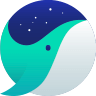
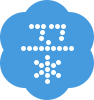

In [53]:
import urllib.request as rq
import re

url='http://www.naver.com'
html = rq.urlopen(url)
bs3 = BeautifulSoup(html,'lxml')

bs3


In [224]:
import requests as rq
import re
from bs4 import BeautifulSoup
url = 'http://www.naver.com'

html = rq.get(url).text
soup = BeautifulSoup(html,'lxml')
data = soup.find_all('span')

li = []
for i in data:
    li.append(i.get_text())

a = re.sub('[^가-힣]',' ',str(li))
re.sub('\s{2,}','',a)

'뉴스스탠드 바로가기주제별캐스트 바로가기타임스퀘어 바로가기쇼핑캐스트 바로가기로그인 바로가기매일 쓰는 브라우저 보안이 걱정된다면안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요매일 쓰는 브라우저 보안이 걱정된다면다운로드쥬니어네이버해피빈검색한글 입력기자동완성 레이어삭제설정이 초기화 된다면 도움말을 확인해주세요설정이 초기화 된다면 도움말을 확인해주세요도움말도움말자동저장 끄기자동저장 끄기회차 당첨번호추첨지급기한년추첨지급기한년원원바로가기바로가기추가추가추가자세히보기도움말신고도움말신고자동완성 끄기자동완성 끄기쇼핑쇼핑이태원동이태원동리스트형썸네일형설정이전다음닫기닫기이전다음닫기닫기이전다음다음닫기닫기이전다음닫기닫기주제별로 분류된 다양한 글 모음개의 글이전다음김해나김해나닥터바이오 더마 코스메틱닥터바이오 더마 코스메틱일 전뷰스타 민슨뷰스타 민슨개월 전계피계피주일 전주플리주플리주일 전슈비둡슈비둡재생재생시간재생시간개월 전디렉터파이디렉터파이재생재생시간재생시간개월 전디렉터파이디렉터파이재생재생시간재생시간개월 전디렉터파이디렉터파이주일 전횬블리횬블리개월 전민됴민됴주일 전메이쥬니메이쥬니주일 전르미르미재생재생시간재생시간개월 전디렉터파이디렉터파이재생재생시간재생시간개월 전갓신상갓신상재생재생시간재생시간개월 전디렉터파이디렉터파이주일 전쥬니쥬니주일 전비비쥬비비쥬주일 전하디미하디미주일 전데이즈데이즈주일 전최뮤즈최뮤즈재생재생시간재생시간개월 전파우더룸파우더룸재생재생시간재생시간개월 전디렉터파이디렉터파이재생재생시간재생시간개월 전미소정미소정주일 전지끙이지끙이주일 전쥬니꽃쥬니꽃개월 전케잌차케잌차주일 전쟈니쟈니주일 전김태니김태니재생재생시간재생시간개월 전디렉터파이디렉터파이재생재생시간재생시간개월 전뷰티 여드름 인씨뷰티 여드름 인씨재생재생시간재생시간개월 전디렉터파이디렉터파이주일 전밍야밍야주일 전주일 전의율의율개월 전헤일리헤일리주일 전귀톨이귀톨이재생재생시간재생시간개월 전옆집언니 최실장옆집언니 최실장재생재생시간재생시간개월 전옆집언니 최실장옆집언니 최실장재생재생시간재생시간개월 전기은세기은세주일 전르엔르엔주일 전신디엘신디엘개월 전보

### 과제 0725-4

Q. "http://www.naver.com" 사이트에서 span 태그에 연결된 문자+숫자백을 불필요한 공백을 제거한 후 출력하세요.

In [226]:
from bs4 import BeautifulSoup
import requests as rq
import re

url = 'http://naver.com'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')

items = bs.find_all('span')
b = ''
for i in items:
    b += i.get_text()

b = re.sub('[^가-힣0-9]',' ',b)
b = re.sub('\s{2,}',' ',b)
b

'뉴스스탠드 바로가기주제별캐스트 바로가기타임스퀘어 바로가기쇼핑캐스트 바로가기로그인 바로가기매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 매일 쓰는 브라우저 보안이 걱정된다면 다운로드쥬니어네이버해피빈검색한글 입력기자동완성 레이어 삭제 설정이 초기화 된다면 도움말을 확인해주세요 설정이 초기화 된다면 도움말을 확인해주세요 도움말 도움말 자동저장 끄기 자동저장 끄기 5 회차 당첨번호 추첨 13 지급기한 1년 추첨 13 지급기한 1년 6 7 8 9 10 11 12 6 7 8 9 10 11 12 14 8 9 8 9 6 원 6 원 7 7 7 8 7 8 7 5 5 바로가기 바로가기 추가 추가 추가 자세히보기 도움말 신고 도움말신고 자동완성 끄기 자동완성 끄기 쇼핑쇼핑 24 0 33 0 이태원동이태원동리스트형썸네일형설정이전다음닫기닫기이전다음닫기닫기이전다음다음닫기닫기이전다음닫기닫기주제별로 분류된 다양한 글 모음676 개의 글이전다음황비노 포롱 최서희황비노 포롱 최서희요일별 웹툰요일별 웹툰김부장김부장마루는 강쥐마루는 강쥐위유지 박태준 만화회사 정종택 39화 성한수의 낭만 위유지 야옹이 217화위유지 비완 40화 지금은 약한 척위유지 모죠 7화 강적 등장 위유지 홍비치라 2부 62화 사람을 살리는 사람 2 위유지 언데드 감자 제 25 화위상승 요다 42화 주제 잡기 3 위하락 플랜에이 8화위하락 오세형 시즌2 마지막화 강한녀석들위유지 나락 풍백 60화 성유물 14 위유지 비가 25화 무료위상승 린더 50화 무료위상승 퀀텀 50화 무료위상승 블루클리프 50화 무료위유지 성혜림 위상승 한중월야 27화 무료위상승 정선율 헤스 25화 무료위상승 해달벗 25화 무료위유지 하노 위하락 장영훈 25화 무료위유지 위유지 위하락 박태준 만화회사 정종택 39화 무료위하락 근서 비완 40화 무료위하락 야옹이 222화 무료위하락 철범 산천 우푸 32화 무료위하락 싱숑 언데드 감자 26화 무료위유지 위상승 박태준 만화회사 40화 무료위하락 니콜로 플랜에이 8화 

### 과제0725_5
Q. "http://www.naver.com" 사이트에서 span 태그에 id가 있는 경우에 대하여 문자+숫자를 불필요한 공백을 제거한 후 출력하세요.

In [117]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://www.naver.com'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')

texts = bs.select('a[id]')
# print(texts)

li = []
for t in texts:
    li.append(t.get_text())


p = re.sub('[^\w+\d+]',' ', str(li))
p = re.sub('\s+',' ', p)
print(p)


 다운로드 네이버를 시작페이지로 한글 입력기 자동완성 레이어 관심주제 설정 TOP 


In [118]:
import re
import requests
from bs4 import BeautifulSoup

url = "http://www.naver.com"
responds = requests.get(url)
html = responds.text

soup = BeautifulSoup(html, 'html.parser')
tag_a_list = soup.select('a')

li = []
for a in tag_a_list:
    if bool(a.get("class")) == True:
            li.append(a.text)
            

li = [re.sub('[^가-힣0-9]+',' ',str(i)).strip() for i in li]

text = " ".join(li)
text = re.sub('\s+',' ',text)
text


' 다운로드 네이버를 시작페이지로 쥬니어네이버 해피빈 한글 입력기 자동완성 레이어 전체삭제 삭제 도움말 도움말 자동저장 끄기 5 회차 당첨번호 추첨 13 지급기한 1년 6 7 8 9 10 11 12 14 8 9 6 원 7 7 8 5 바로가기 추가 추가 추가 자세히보기 관심사를 반영한 컨텍스트 자동완성도움말 컨텍스트 자동완성 자세히 로그인 자세히 컨텍스트 자동완성 레이어 닫기 신고 자동완성 끄기 메일 카페 블로그 지식 쇼핑 쇼핑 사전 뉴스 증권 부동산 지도 도서 웹툰 더보기 서비스 전체보기 메뉴설정 초기화 저장 29 2 맑음 24 0 33 0 이태원동 미세좋음 초미세좋음 이태원동 연합뉴스 대통령 치안 관서장 집단행동 깊은 우려 중대 국가기강문란 이상민 경찰 집단반발 확산에 부화뇌동 대단히 위험 경감 경위급 회의 14만 전체 경찰회의로 확대 개최 추진 신규확진 9만9327명 석달만에 다시 10만명 근접 위중증 168명 안철수 김경수 사면 공개반대 국정농단 파괴범 면죄부 안돼 권영세 유엔사 강제북송 알고 승인 아냐 정부에 강력항의 2분기 경제성장률 0 7 민간소비 3 0 늘었지만 수출 3 1 줄어 소득세 물가연동제 선 긋는 정부 고소득층에 더 큰 혜택 전세가 쌓인다 서울 아파트 평균 전셋값 39개월 만에 하락 경부고속철도 신경주역 부근 신호 장애로 열차 최장 1시간 지연 뉴스홈 연예 스포츠 경제 뉴스스탠드 구독한 언론사 전체언론사 리스트형 썸네일형 설정 이전 다음 종합 경제 방송 통신 영자지 스포츠 연예 매거진 전문지 지역 닫기 확인 닫기 확인 취소 이전 다음 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기 구독 해지 기사보기

### 과제0725_6
Q."http://www.naver.com" 사이트에서 a 태그에 id가 있는 경우에 대하여 연결된 문자 + 숫자를 불필요한 공백을 제거한 후 한줄에 출력하세요.

In [122]:
from bs4 import BeautifulSoup
import requests as rq

url='http://www.naver.com'
html = rq.get(url).text
bs5 = BeautifulSoup(html,'lxml')

items = bs5.find_all('a',id=True)
item = str(items)

p1= re.sub('[^가-힣0-9]',' ',item)
p2 = re.sub('\s+',' ',p1)

p2

' 2 1 7 0436 7 다운로드 네이버를 시작페이지로 한글 입력기 2 자동완성 레이어 관심주제 설정 '

### 과제0725_7
url = 'https://news.naver.com/' 사이트 p태그에서 class가 cjs_ht인 데이터를 한글만을 불필요한 공백을 제거한 후 출력하세요.


In [129]:
#class가 cjs_ht인 데이터
url='https://news.naver.com/' 
html = rq.get(url).text
bs6 = BeautifulSoup(html,'lxml')
bs6

bs61 = bs6.find(attrs={'class':'cjs_ht'})
t6 = bs61.get_text()

p = re.sub('[^가-힣]',' ',t6)
p = re.sub('\s{2,}',' ',p)
p

' 오늘 언론사가 발행한종이신문에 실린 뉴스 면기사가 제공됩니다 '

In [123]:
from bs4 import BeautifulSoup as bsoup
import re
import requests
url = 'https://news.naver.com/'
req = requests.get(url)
html = req.text

soup = bsoup(html, 'html.parser')
result = soup.find_all('p', attrs={'class':"cjs_ht"}) # p class = "cjs_ht" 찾기
result

q = re.sub('[^가-힣]', ' ', str(result))  # 다시 문자화시켜서 re.sub
words = re.sub('\s+', " ", q)
# words = " ".join(re.split(r'\s+', q))
words = words[1:-1]
words


'오늘 언론사가 발행한 종이신문에 실린 뉴스 면 기사가 제공됩니다'

In [130]:
from bs4 import BeautifulSoup
import urllib.request as rq

url = 'https://naver.com/'
html = rq.urlopen(url)
bs = BeautifulSoup(html,'lxml')

print(bs.find_all('p',limit=1),'\n') # p태그 1개
print(bs.find_all('p',limit=2),'\n') # p태그 2개
print(bs.find_all('p',limit=3),'\n') # p태그 3개

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>] 

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>, <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>] 

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>, <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>, <p class="dsc"><em class="txt">동일한 시간대/연령/남녀별</em> 사용자 그룹의<br/>관심사에 맞춰 자동완성을 제공합니다.</p>] 



In [137]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.daum.net/politics'
html = rq.get(url)
html = html.text
bs = BeautifulSoup(html,'lxml')
title = bs.find_all('h2',id=True)
title

[<h2 class="screen_out" id="mainContent">정치</h2>]

In [139]:
title = bs.find('h2',id='mainContent').text
title

'정치'

In [ ]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.daum.net/politics'
html = rq.get(url)
html = html.text
bs = BeautifulSoup(html,'lxml')
title = bs.select_one('#gnbContent > div > ul > li.on > a > span').text
title


In [81]:
#Q. 네이버 영화 랭킹 가져와서 첫번째 영화제목을 출력하세요.

from bs4 import BeautifulSoup
import requests as rq

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'
html = rq.get(url)
html = html.text
bs = BeautifulSoup(html,'lxml')

title = bs.find_all('div',class_='tit3')

li = []
for i in title :
    print(li.text)

AttributeError: 'list' object has no attribute 'text'

### 과제 0726-1

네이버 영화 랭킹 가져와서 조회순 전체 영화제목을 출력하세요 
(출력방식 => 1위: 외계+인 ...)

In [92]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'
html = rq.get(url)
html = html.text
bs = BeautifulSoup(html,'lxml')

title = bs.find_all('div',class_='tit3')

rank = 0

for t in title:
    for i in range(1):
        rank += 1
    t = t.text
    print(f'{rank}위: {t}입니다')
    

1위: 
외계+인 1부
입니다
2위: 
탑건: 매버릭
입니다
3위: 
한산: 용의 출현
입니다
4위: 
헤어질 결심
입니다
5위: 
범죄도시2
입니다
6위: 
그레이 맨
입니다
7위: 
토르: 러브 앤 썬더
입니다
8위: 
미니언즈2
입니다
9위: 
마녀(魔女) Part2. The Other One
입니다
10위: 
비상선언
입니다
11위: 
더 킬러: 죽어도 되는 아이
입니다
12위: 
명탐정 코난: 할로윈의 신부
입니다
13위: 
엘비스
입니다
14위: 
뒤틀린 집
입니다
15위: 
헌트
입니다
16위: 
썸머 필름을 타고!
입니다
17위: 
아이를 위한 아이
입니다
18위: 
멘
입니다
19위: 
브로커
입니다
20위: 
놉
입니다
21위: 
쥬라기 월드: 도미니언
입니다
22위: 
뽀로로 극장판 드래곤캐슬 대모험
입니다
23위: 
메모리
입니다
24위: 
닥터 스트레인지: 대혼돈의 멀티버스
입니다
25위: 
임파서블 러브
입니다
26위: 
범죄도시
입니다
27위: 
핸썸
입니다
28위: 
오싹한 동거
입니다
29위: 
스파이형 모델
입니다
30위: 
굿 럭 투 유, 리오 그랜드
입니다
31위: 
극장판 주술회전 0
입니다
32위: 
로스트 도터
입니다
33위: 
섹스 앤 퓨리
입니다
34위: 
탑건
입니다
35위: 
군다
입니다
36위: 
명량
입니다
37위: 
버즈 라이트이어
입니다
38위: 
큐어
입니다
39위: 
니얼굴
입니다
40위: 
VR 파이터
입니다
41위: 
리미트
입니다
42위: 
특송
입니다
43위: 
불릿 트레인
입니다
44위: 
마녀
입니다
45위: 
귀멸의 칼날: 아사쿠사 편
입니다
46위: 
보스 베이비 2
입니다
47위: 
감동주의보
입니다
48위: 
DC 리그 오브 슈퍼-펫
입니다
49위: 
클라우스
입니다
50위: 
극장판 도라에몽: 진구의 우주소전쟁 리틀스타워즈 2021
입니다


In [102]:
import re
for i,t in enumerate(title):
    t = re.sub('^\s+|\s+|${2,}',' ',t.text)
    print(f'{i}위: {t}입니다.')

error: nothing to repeat at position 10

In [173]:
html = """
<ul>
  <li><a href="hoge.html">hoge</li>
  <li><a href="https://example.com/fuga">fuga*</li>
  <li><a href="https://example.com/foo">foo*</li>
  <li><a href="http://example.com/aaa">aaa</li>
</ul>
"""

import re

bs = BeautifulSoup(html,'html.parser')
li = bs.find_all(href=re.compile('^https://'))
for e in li:
    print(e.attrs['href'])

https://example.com/fuga
https://example.com/foo


### CSS 선택자
- 원하는 정보만 선별하여 수집하고 싶을 때 css선택자를 활용할 수 있음
- (CSS 선택자 설명 추가)
- F12 >> 수집하고 싶은 부분 클릭 >> 태그 선택 >> copy Selector
- BeautifulSoup의 select_one, select 활용


In [182]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.daum.net/politics'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html,'lxml')
# select 여러개 하려면 군더더기 빼야함
lines = bs.select('body > div.container-doc.cont-category > main > section > div.main-sub > div.box_g.box_news_major > ul > li:nth-child(1)')
body = '\n'.join([line.text for line in lines])
print(body)



MBC
2주 넘게 '두문불출' 김 여사..목요일 등장할까?




In [193]:
#Q. '2주 넘게 '두문불출' 김 여사..목요일 등장할까? '제목의 기사 내용을 출력하세요.
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.v.daum.net/v/20220726105712920'
html = rq.get(url).text
bs = BeautifulSoup(html, 'html.parser')

print(bs.select_one('#cSub > div > h3').text, '\n')

for p in bs.select('#harmonyContainer > section >p'):
    print(p.text, '\n')



2주 넘게 '두문불출' 김 여사..목요일 등장할까? 

■ "마드리드 이후 김건희 여사가 안 보인다" 

윤석열 대통령의 지지율 추이와 더불어 최근 언론이 자주 언급하는 기사는 "김건희 여사가 공개 행보를 중단했다"는 내용입니다.  

북대서양조약기구, NATO 순방 동행을 마치고 난 뒤 두문불출하고 있다는 겁니다. 

 정치평론가들은 김 여사가 공개 행보에 나설 때마다 관심을 끌기는 했지만 팬클럽, 수행원, 제2부속실 설치, 명품 목걸이 논란 등으로 부정적인 여론이 대두되자 ‘리스크 관리’에 들어간 것으로 보고 있습니다.  

장성철 공론센터 소장은 “김건희 여사가 최근 2주간 사라졌다”면서 “김 여사가 지지율에 중대한 영향을 끼친다는 정무적인 판단이 있었을 것”이라고 말했습니다. 배종찬 인사이트케이 소장 역시 윤 대통령의 지지율 하락 원인 중 하나로 김건희 여사를 꼽았습니다. 배 소장은 경제, 인사, 양극화, 김 여사, 도어스테핑의 앞글자를 딴 ‘경인양김도’가 지지율이 떨어진 이유라고 분석했습니다. 유튜브 채널 ‘시사저널 TV’에 출연한 진중권 전 교수는 “지금 김건희 여사는 잘하고 있는 것 아니냐?”는 사회자의 질문에 “그렇다. 조금 더 기다려야 될 것 같다”고 조언하기도 했습니다. 

■ 공개행보 재개는? 목요일 진수식이 유력 

그렇다면 김건희 여사는 언제쯤 다시 언론에 모습을 드러낼까요? 목요일인 28일이 될 가능성이 높습니다. 차세대 이지스함인 정조대왕 진수식이 열리는데, 여기에 참석하지 않을까 예상됩니다. 

배에 이름을 붙이고 처음 물에 띄워 바다로 내보내는 의식인 진수식(進水式)에서는 진수도끼(보통 금토끼)로 밧줄을 끊거나 샴페인을 깨는 행사가 있습니다. 진수식의 하이라이트인데요, 관례적으로 여성이 해왔다고 합니다. 왜 여성이 하게 됐는지를 놓고 영국 빅토리아 여왕이 세레모니를 한 이후 관례로 굳어졌다는 설도 있고, 배(ship)를 여성 대명사인 she로 받는데서 유래했다 혹은 탯줄을 자르는 상징적인 의미가 있기 때문에 여성이 하게 됐다는 여

In [194]:
# 기사 본분 가져오기
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.v.daum.net/v/20220726105712920'
r = rq.get(url)
html = r.text
soup = BeautifulSoup(html, 'lxml')
lines = soup.select('#harmonyContainer > section > p')
article = [line.text for line in lines]
article = ' '.join(article)
article


'■ "마드리드 이후 김건희 여사가 안 보인다" 윤석열 대통령의 지지율 추이와 더불어 최근 언론이 자주 언급하는 기사는 "김건희 여사가 공개 행보를 중단했다"는 내용입니다.  북대서양조약기구, NATO 순방 동행을 마치고 난 뒤 두문불출하고 있다는 겁니다.  정치평론가들은 김 여사가 공개 행보에 나설 때마다 관심을 끌기는 했지만 팬클럽, 수행원, 제2부속실 설치, 명품 목걸이 논란 등으로 부정적인 여론이 대두되자 ‘리스크 관리’에 들어간 것으로 보고 있습니다.  장성철 공론센터 소장은 “김건희 여사가 최근 2주간 사라졌다”면서 “김 여사가 지지율에 중대한 영향을 끼친다는 정무적인 판단이 있었을 것”이라고 말했습니다. 배종찬 인사이트케이 소장 역시 윤 대통령의 지지율 하락 원인 중 하나로 김건희 여사를 꼽았습니다. 배 소장은 경제, 인사, 양극화, 김 여사, 도어스테핑의 앞글자를 딴 ‘경인양김도’가 지지율이 떨어진 이유라고 분석했습니다. 유튜브 채널 ‘시사저널 TV’에 출연한 진중권 전 교수는 “지금 김건희 여사는 잘하고 있는 것 아니냐?”는 사회자의 질문에 “그렇다. 조금 더 기다려야 될 것 같다”고 조언하기도 했습니다. ■ 공개행보 재개는? 목요일 진수식이 유력 그렇다면 김건희 여사는 언제쯤 다시 언론에 모습을 드러낼까요? 목요일인 28일이 될 가능성이 높습니다. 차세대 이지스함인 정조대왕 진수식이 열리는데, 여기에 참석하지 않을까 예상됩니다. 배에 이름을 붙이고 처음 물에 띄워 바다로 내보내는 의식인 진수식(進水式)에서는 진수도끼(보통 금토끼)로 밧줄을 끊거나 샴페인을 깨는 행사가 있습니다. 진수식의 하이라이트인데요, 관례적으로 여성이 해왔다고 합니다. 왜 여성이 하게 됐는지를 놓고 영국 빅토리아 여왕이 세레모니를 한 이후 관례로 굳어졌다는 설도 있고, 배(ship)를 여성 대명사인 she로 받는데서 유래했다 혹은 탯줄을 자르는 상징적인 의미가 있기 때문에 여성이 하게 됐다는 여러 가지 설들이 있습니다.  김건희 여사가 진수식에 등장할지는 목요일 확인할 수

### 크롤링) 접속 차단되었을때 User-Agent지정(header)
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kiddwannabe&logNo=221185808375

https://www.whatismybrowser.com/detect/what-is-my-user-agent/

headers = {'User-Agent' : '유저정보'}
url = '접속하고픈사이트'
requests.get(url, headers = headers)

-----------------------------------------------------------------------

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.134 Safari/537.36 Edg/103.0.1264.71) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
url = '접속하고픈사이트'
requests.get(url, headers = headers)


In [195]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102'
req = rq.get(url)
bs = BeautifulSoup(req.content,'html.parser')
print(bs)

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [197]:
headers = {'User-Agent' :'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.134 Safari/537.36 Edg/103.0.1264.71) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102'
requests.get(url, headers = headers)
bs = BeautifulSoup(req.content,'html.parser')
print(bs)


<!DOCTYPE html>

<html lang="ko">
<head>
<title id="browserTitleArea">네이버 뉴스</title>
<script>
	function isMobileDevice() {
		return /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);
	}
</script>
<script>
	(function () {
		try {
			if (isMobileDevice() && isAbleApplyPrefersColorScheme()) {
				
				document.querySelector("html").classList.add("DARK_THEME");
			}
		} catch(e) {}

		function isAbleApplyPrefersColorScheme() {
			
			if (window.matchMedia("(prefers-color-scheme)").matches === false) {
				return false;
			}

			var userAgent = navigator.userAgent;

			if (userAgent.indexOf("NAVER") > -1) {
				
				if (/.*NAVER\([a-zA-Z]*;\s[a-zA-Z]*;\s([0-9]*);/.test(userAgent)) {
					return Number(RegExp.$1) >= 1000;
				}
			} else {
				
				return document.cookie.indexOf("NSCS=1") > -1;
			}

			return false;
		}
	})();
</script>
<script>
		var g_ssc = 'news.v3_media' || null;
		</script>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1.0,maximum-s

In [202]:
target = bs.select('#main_content > div > div > div > div > div > ul > li > div > a')
for element in target:
    print(element.text)
    print(element['href'])

In [204]:
# 이미지 추출
url = 'https://n.news.naver.com/mnews/article/003/0011326203?sid=102'
r = rq.get(url,headers=headers)
html = r.text
bs = BeautifulSoup(html,'lxml')
target = bs.select_one('#img1')
print(target)
print('-'*100)
print(target['data-src'])

<img class="_LAZY_LOADING" data-src="https://imgnews.pstatic.net/image/003/2022/07/26/NISI20220726_0001049621_web_20220726083334_20220726110112212.jpg?type=w647" id="img1"/>
----------------------------------------------------------------------------------------------------
https://imgnews.pstatic.net/image/003/2022/07/26/NISI20220726_0001049621_web_20220726083334_20220726110112212.jpg?type=w647


Q. url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100' 사이트에서 뉴스기사를 출력하세요.
- 용도는 주요 키워드 분석을 위한 데이터 셋 만들기

In [217]:
url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100'
r = rq.get(url,headers=headers)
html = r.text
bs = BeautifulSoup(html,'lxml')

lines = bs.select('#main_content > div > div > div > div > div > ul > li > div > a')

body = '\n'.join([line.text for line in lines])
bs = re.sub('[^가-힣]+',' ',body)

print(bs)

 경찰 집단반발에 중대한 국가 기강문란 깊은 우려 윤 대통령 경찰 집단반발에 중대 국가기강문란 국가 기본 질서 흔들려선 안돼 노조 파업도 경찰 반발도 강 강 강 서장들 집단 행동 깊은 우려 중대한 국가기강 문란 경찰은 총쥐고 있는 공권력 항명 안돼 경찰복 벗고 정치 나서라 권성동 경찰은 총을 쥔 공권력 집단행동 용납 불가 권성동 경찰은 총을 쥔 공권력 어떤 집단행동도 용납 못해 권성동 경찰 항명 집단행동에 단호 대응해야 용납할 수 없어 김경수 사면 말 나오자 안철수 국정농단 주범 면죄부 안돼 안철수 김경수 사면 공개 반대 국정농단 주범에 면죄부 안돼 안철수 김경수 사면 공개반대 국정농단 파괴범 면죄부 안돼 안철수 김경수 사면론에 반성없는 대선 여론조작 주범에 면죄부 안돼 속보 행안부 경찰국 신설안 국무회의 의결 내달 일 공포 행안부 경찰국 신설안 국무회의 의결 내달 일 공포 국가 기강 문란 경찰국 신설안 국무회의 통과 행안부 경찰국 신설안 국무회의 의결 월 일 시행 여가부 업무보고 시간 동안 폐지 계획 보고 안 했다 대통령 여가부 폐지 로드맵 조속히 마련 지시 박범계 법무부 인사검증 법치농단 한동훈 그러면 민정실도 위법 박범계 한동훈 정면충돌 검찰 인사 전부 한 장관이 전례 있나 장관일 때 총장 패싱 인사한 걸로 안다 이번엔 셀프공천 논란 설훈 이재명 해명하라 박용진 이재명 계양을 셀프공천 직접 해명해야 이준석 울릉도 입도 보수 텃밭 공략에 속도 이준석 장외정치 계속 오늘 울릉도서 당원들과 만남 국힘 정운천 내년 전주을 재선거 고민 중 대 총선은 출마 박종덕 전 학원연합회장 전주을 무소속 출마 선언 이재명 민생 해결능력 부각 단일화는 수면 아래로 종합 컷오프 비명계 단일화 띄우기 이재명은 기지개 이종섭 국방장관 탈북 어민 북송 시 판문점 통과 유엔사가 승인 탈북어민 북송 때 유엔사 정부에 항의 권영세 강제북송인 건 몰랐다 한총리 경찰국 신설안 더 투명하고 민주적인 관장 위한 것 속보 한덕수 총리 코로나 개량백신 하반기 도입 월말 계획 발표 민주당 경찰국 설치 

In [212]:
from konlpy.tag import Okt
from collections import Counter
from bs4 import BeautifulSoup
import requests

url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100'
rqs = requests.get(url,headers=headers).text
bs = BeautifulSoup(rqs,'lxml')
bs = bs.find_all('div',class_='cluster')
result = []
for i in bs:
    result.append(i.get_text())
bs = re.sub('[^가-힣]+',' ',str(result))

okok = Okt()
okok2 = okok.pos(bs)
okre = []
for i, j in okok2:
    if (j =='Noun')& (len(i)> 1 ):
        okre.append(i)

okreid = dict(Counter(okre).most_common())
okreid = sorted(okreid.items(), key=lambda x:x[1], reverse=True)
okreid


[('경찰', 28),
 ('뉴스', 21),
 ('장관', 20),
 ('관련', 19),
 ('보기', 18),
 ('정부', 18),
 ('신설', 14),
 ('민주당', 14),
 ('대통령', 13),
 ('박범계', 9),
 ('윤석열', 8),
 ('쿠데타', 8),
 ('법무부', 8),
 ('한동훈', 8),
 ('정치', 8),
 ('기사', 7),
 ('대해', 7),
 ('행안부', 7),
 ('국민', 7),
 ('의원', 7),
 ('이상민', 7),
 ('북송', 7),
 ('사면', 6),
 ('폐지', 6),
 ('질문', 6),
 ('톡톡', 6),
 ('국회', 5),
 ('경제', 5),
 ('문란', 5),
 ('국무회의', 5),
 ('반발', 5),
 ('안철수', 5),
 ('김경수', 5),
 ('논란', 5),
 ('여가부', 5),
 ('설전', 5),
 ('재선거', 5),
 ('박지원', 5),
 ('이채익', 4),
 ('토론', 4),
 ('경찰대', 4),
 ('국가', 4),
 ('오늘', 4),
 ('국정', 4),
 ('농단', 4),
 ('행정', 4),
 ('행정안전부', 4),
 ('용산', 4),
 ('이준석', 4),
 ('일보', 4),
 ('위원회', 4),
 ('한국', 4),
 ('여야', 4),
 ('인사', 4),
 ('권영세', 4),
 ('강제', 4),
 ('항의', 4),
 ('수신료', 4),
 ('박종덕', 4),
 ('출마', 4),
 ('헤드라인', 3),
 ('내용', 3),
 ('문제', 3),
 ('뉴시스', 3),
 ('장악', 3),
 ('동영상', 3),
 ('기강', 3),
 ('동아일보', 3),
 ('상정', 3),
 ('면죄부', 3),
 ('라며', 3),
 ('반대', 3),
 ('박홍근', 3),
 ('발상', 3),
 ('경찰서', 3),
 ('발언', 3),
 ('울릉도', 3),
 ('징계', 3),
 ('이후', 3),
 ('당원',

## 과제0726-2
네이버 카테고리별 기사를 아래 카테고리 정의를 기준으로 크롤링한 후 불필요한 공백을 제거하고 한글만으로 된 데이터 프레임을 출력하세요.

전체, 카테고리별

- 카테고리 정의
    - 100 정치
        - (청와대[264] + 국회/정당[265] + 북한[268] + 국방/외교[267])

    - 101 경제
        - (금융[259] + 증권[258] + 산업/재계[261] + 글로벌 경제[262] + 부동산[260])

    - 103 생활/문화
        - (건강정보[241] + 여행/레저[237] + 공연/전시[242] + 날씨[248] + 생활문화 일반[245])

    - 105 IT/과학
        - (통신/뉴미디어[227] + IT 일반[230] + 컴퓨터[283] + 과학 일반[228])
        
- 카테고리별 1000개, 총 4천개로 구성된 데이터프레임 생성


In [ ]:
# 웹구조 파악  : sid1=100, sid2=264, page=15

#sid1=100 (정치)
https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100
#sid2=265 (정치>대통령실)
https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid1=100&sid2=264
#페이지 수 확인 (15페이지)
https://news.naver.com/main/list.naver?mode=LS2D&sid2=264&sid1=100&mid=shm&date=20220726&page=15
    
    
url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1=100&mid=shm&date=20220726&page='+str(i+1)


In [218]:
import pandas as pd
news_df = pd.DataFrame(columns=['news','category'])
news_df

Empty DataFrame
Columns: [news, category]
Index: []

In [222]:
from bs4 import BeautifulSoup
import requests

#100 정치(청와대[264] + 국회/정당[265] + 북한[268] + 국방/외교[267])
cats = [264,265,266,267]
ind=0 # 행번호
for cat in cats:
    for i in range(15):
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1=100&mid=shm&date=20220726&page='+str(i+1)
        headers = {'User-Agent' :'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.134 Safari/537.36 Edg/103.0.1264.71) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
        news = requests.get(url,headers=headers)
        bs = BeautifulSoup(news.text,'html.parser')
        links = bs.select('#main_content > div > ul> li > dl > dt > a')
        newslinks=[]
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) # 중복 기사 제거
            
        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2,'html.parser')
            news = bs2.find('div',id=['dic_area']).text
            news = re.sub('\n',' ',news) # 개행 공백으로
            news = re.sub('\t',' ',news) # tab공백으로
            news_df.loc[ind] = [news,cat]
            ind += 1
news_df

news  category
0      기사내용 요약티타임 '검언유착' 비판에 "그렇게 보이지 않는다""공직자, 언론으로...       264
1      법무부 업무보고서 "법무행정 최우선은 경제 살리기"한동훈 장관 "특사 논의는 없었...       264
2          [서울=뉴시스] 윤석열 대통령이 26일 서울 용산 대통령실 청사에서 한동훈...       264
3         [[the300](상보)]    윤석열 대통령이 26일 용산 대통령실 집무실...       264
4              (서울=연합뉴스) 안정원 기자 = 윤석열 대통령이 26일 오전 서울...       264
...                                                 ...       ...
1195   한화시스템과 함께 개발… "국내 기술로 추진체계 통합 기대"    '함정추진체계 ...       267
1196           (서울=연합뉴스) 김승두 기자 = 한덕수 국무총리가 26일 오전 정...       267
1197           (서울=연합뉴스) 김승두 기자 = 한덕수 국무총리(왼쪽)와 추경호 ...       267
1198           (영종도=연합뉴스) 임헌정 기자 = 이종섭 국방부 장관이 미국 워싱...       267
1199           (영종도=연합뉴스) 임헌정 기자 = 이종섭 국방부 장관이 미국 워싱...       267

[1200 rows x 2 columns]

In [227]:
#101 경제(금융[259] + 증권[258] + 산업/재계[261] + 글로벌 경제[262] + 부동산[260])
from bs4 import BeautifulSoup
import requests
import pandas as pd

news_df1 = pd.DataFrame(columns=['news','category'])
news_df1

cats = [259,258,261,262,260]
ind=0 # 행번호
for cat in cats:
    for i in range(15):
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1=101&mid=shm&date=20220726&page='+str(i+1)
        headers = {'User-Agent' :'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.134 Safari/537.36 Edg/103.0.1264.71) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
        news = requests.get(url,headers=headers)
        bs = BeautifulSoup(news.text,'html.parser')
        links = bs.select('#main_content > div > ul> li > dl > dt > a')
        newslinks=[]
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) # 중복 기사 제거
            
        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2,'html.parser')
            news = bs2.find('div',id=['dic_area']).text
            news = re.sub('\n',' ',news) # 개행 공백으로
            news = re.sub('\t',' ',news) # tab공백으로
            news_df1.loc[ind] = [news,cat]
            ind += 1
news_df1

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [ ]:
#103 생활/문화(건강정보[241] + 여행/레저[237] + 공연/전시[242] + 날씨[248] + 생활문화 일반[245])
from bs4 import BeautifulSoup
import requests
import pandas as pd

news_df2 = pd.DataFrame(columns=['news','category'])
news_df2

cats = [241,237,242,248,245]
ind=0 # 행번호
for cat in cats:
    for i in range(15):
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1=103&mid=shm&date=20220726&page='+str(i+1)
        headers = {'User-Agent' :'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.134 Safari/537.36 Edg/103.0.1264.71) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
        news = requests.get(url,headers=headers)
        bs = BeautifulSoup(news.text,'html.parser')
        links = bs.select('#main_content > div > ul> li > dl > dt > a')
        newslinks=[]
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) # 중복 기사 제거
            
        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2,'html.parser')
            news = bs2.find('div',id=['dic_area']).text
            news = re.sub('\n',' ',news) # 개행 공백으로
            news = re.sub('\t',' ',news) # tab공백으로
            news_df2.loc[ind] = [news,cat]
            ind += 1
news_df2

In [ ]:
#105 IT/과학(통신/뉴미디어[227] + IT 일반[230] + 컴퓨터[283] + 과학 일반[228])from bs4 import BeautifulSoup
import requests
import pandas as pd

news_df3 = pd.DataFrame(columns=['news','category'])
news_df3

cats = [227,230,283,228]
ind=0 # 행번호
for cat in cats:
    for i in range(15):
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1=105&mid=shm&date=20220726&page='+str(i+1)
        headers = {'User-Agent' :'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.134 Safari/537.36 Edg/103.0.1264.71) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
        news = requests.get(url,headers=headers)
        bs = BeautifulSoup(news.text,'html.parser')
        links = bs.select('#main_content > div > ul> li > dl > dt > a')
        newslinks=[]
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) # 중복 기사 제거
            
        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2,'html.parser')
            news = bs2.find('div',id=['dic_area']).text
            news = re.sub('\n',' ',news) # 개행 공백으로
            news = re.sub('\t',' ',news) # tab공백으로
            news_df3.loc[ind] = [news,cat]
            ind += 1
news_df3

In [ ]:
news_total = pd.concat([news_df,news_df1,news_df2,news_df3],axis=1)

# 데이터 처리 및 시각화

In [3]:
import json
import pandas as pd


with open('./news_df', "r") as f:
    js = json.loads(f.read())
    
df = pd.DataFrame(js)
df = pd.read_json('./news_df')
df


news  category
0       尹 대통령 "기업활동 위축시키는 과도한 형벌 규정 개선" 지시       264
1        국방부 “유엔사, 판문점 통과 허용…북송 승인 의미는 아냐”       264
2                      [포토] 육군 대규모 항공작전 훈련       264
3             尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작       264
4     국내 7대 종단 지도자들 "이명박·이재용·김경수 통큰 사면 요청"       264
...                                    ...       ...
3049                 프랑스 유텔샛 “스페이스X 게 섰거라”       228
3050   크리스탈지노믹스, 제이앤씨사이언스와 코로나19 치료제 후보 발굴       228
3051                  세상에서 가장 작은 반도체 구조 규명       228
3052     클래시스 “알파, 복부 지방감소 효과 연구 국제학술지 게재”       228
3053              [부고] 김윤호 SK플라즈마 대표이사 빙부상       228

[3054 rows x 2 columns]

In [4]:
# 데이터 구성 알아보기
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054 entries, 0 to 3053
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   news      3054 non-null   object
 1   category  3054 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 71.6+ KB


In [103]:
df.category.unique

<bound method Series.unique of 0       264
1       264
2       264
3       264
4       264
       ... 
3049    228
3050    228
3051    228
3052    228
3053    228
Name: category, Length: 3054, dtype: int64>

In [106]:
df.category.duplicated

SyntaxError: invalid syntax (1150691219.py, line 1)

## 전체

In [5]:
# 일단 전체 리스트 대상으로 워드클라우드 만들기

# 1. 내용 있는 칼럼인 news 칼럼만 리스트로 만들어주기
df_news_total = df.news.values.tolist()
df_news_total

['尹 대통령 "기업활동 위축시키는 과도한 형벌 규정 개선" 지시',
 '국방부 “유엔사, 판문점 통과 허용…북송 승인 의미는 아냐”',
 '[포토] 육군 대규모 항공작전 훈련',
 '尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작',
 '국내 7대 종단 지도자들 "이명박·이재용·김경수 통큰 사면 요청"',
 "[정치+] 윤대통령, '국기 문란' 경찰 질타…경찰 내부 반발 고조",
 '尹 대통령 최측근 한동훈 법무장관에 무슨 지시했나?',
 '尹대통령 “법무행정 최우선은 경제 살리기…기업 위축하는 형벌규정 개선”',
 '문체부 "청와대 활용 정부 내 혼선 없어…이미 정리"',
 '[법무부 업무보고] 한동훈 "공수처 1년, 국가 범죄대응 역량 약화"',
 '쌍용차 채권단 "변제율 6% 상식적이지 않아"…尹대통령에 탄원',
 '브리핑하는 한동훈 법무부장관',
 "항명이냐 강압이냐…尹 대통령과 '14만 경찰' 대치 전선 고조(종합)",
 '尹 한동훈에 “기업활동 위축 과도한 형벌 개선하라”',
 '윤대통령 "경찰 집단행동 국기문란"…경찰국 신설안 국무회의 통과',
 '"검수완박 이전으로 회귀"…尹, 한동훈에 수사권 강화 보고받아',
 '국내 7대 종단 지도자들 “이명박·이재용·김경수 통큰 특별사면” 탄원',
 '윤 대통령, 한동훈에 "법무행정 최우선, 경제 살리기" 당부',
 '한동훈, \'檢티타임 부활 지적에 "언론으로부터 불편 질문받아야"',
 '박홍근 “경찰국 신설, 이상민 행안부 장관의 행정 쿠데타”',
 '[포토] 육군 이천기지서 열린 대규모 항공작전 FTX',
 '한동훈, 박범계 \'검언유착\' 지적에 "전정부는 흘리기 없었나"',
 '한동훈 "제가 인사 평가 주제 넘어…現검증 시스템 안착 고민할 때"',
 '尹 "법무행정 최우선 경제에"…한동훈 "이재용 사면? 언급 부적절"',
 '공수처, 尹 대통령 ‘사적 채용 논란’ 고발 사건 수사 착수',
 "공수처, 尹대통령 '사적채용 논란' 고발건 수사1부 배당",
 '尹대통령 "기업 활동 위축 과도한 형벌

In [6]:
# 2. 스트링으로 변환 후 sub으로 텍스트 정제해주기
import re
df_news_total_1 = str(df_news_total)
df_news_total_1 = re.sub('[^가-힣0-9]',' ',df_news_total_1)
df_news_total_1 = re.sub('\s{2,}',' ',df_news_total_1)
df_news_total_1

' 대통령 기업활동 위축시키는 과도한 형벌 규정 개선 지시 국방부 유엔사 판문점 통과 허용 북송 승인 의미는 아냐 포토 육군 대규모 항공작전 훈련 유럽에 이어 아세안과도 정상간 비즈니스외교 시작 국내 7대 종단 지도자들 이명박 이재용 김경수 통큰 사면 요청 정치 윤대통령 국기 문란 경찰 질타 경찰 내부 반발 고조 대통령 최측근 한동훈 법무장관에 무슨 지시했나 대통령 법무행정 최우선은 경제 살리기 기업 위축하는 형벌규정 개선 문체부 청와대 활용 정부 내 혼선 없어 이미 정리 법무부 업무보고 한동훈 공수처 1년 국가 범죄대응 역량 약화 쌍용차 채권단 변제율 6 상식적이지 않아 대통령에 탄원 브리핑하는 한동훈 법무부장관 항명이냐 강압이냐 대통령과 14만 경찰 대치 전선 고조 종합 한동훈에 기업활동 위축 과도한 형벌 개선하라 윤대통령 경찰 집단행동 국기문란 경찰국 신설안 국무회의 통과 검수완박 이전으로 회귀 한동훈에 수사권 강화 보고받아 국내 7대 종단 지도자들 이명박 이재용 김경수 통큰 특별사면 탄원 윤 대통령 한동훈에 법무행정 최우선 경제 살리기 당부 한동훈 티타임 부활 지적에 언론으로부터 불편 질문받아야 박홍근 경찰국 신설 이상민 행안부 장관의 행정 쿠데타 포토 육군 이천기지서 열린 대규모 항공작전 한동훈 박범계 검언유착 지적에 전정부는 흘리기 없었나 한동훈 제가 인사 평가 주제 넘어 검증 시스템 안착 고민할 때 법무행정 최우선 경제에 한동훈 이재용 사면 언급 부적절 공수처 대통령 사적 채용 논란 고발 사건 수사 착수 공수처 대통령 사적채용 논란 고발건 수사1부 배당 대통령 기업 활동 위축 과도한 형벌 규정 개선 대통령 복심 한동훈 장관에 기업활동 위축 과도한 형벌규정 개선하라 지시 한동훈 장관에 기업 위축시키는 과도한 형벌 개선하라 뉴스1 윤석열 대통령 경찰 집단 반발 국가 기강 문란 그래픽 경찰국 신설 행안부 직제 개정안 국무회의 통과 한동훈 공정과 상식으로 이끌 분이 검찰총장 되길 희망 법무부 업무보고 받는 윤석열 대통령 한동훈 사면 대통령 고유권한 기준 

In [7]:
# 문자 형태 분석
import requests
from bs4 import BeautifulSoup as bs
import xmltodict
from konlpy.tag import Okt

okt = Okt()
morph = okt.pos(df_news_total_1) #형태소 변환
noun_list = []
for word, tag in morph:
    if(tag=='Noun') & (len(word)>1):
        noun_list.append(word)
print(morph)
print(noun_list)

[('대통령', 'Noun'), ('기업', 'Noun'), ('활동', 'Noun'), ('위축', 'Noun'), ('시키는', 'Verb'), ('과도', 'Noun'), ('한', 'Josa'), ('형벌', 'Noun'), ('규정', 'Noun'), ('개선', 'Noun'), ('지시', 'Noun'), ('국방부', 'Noun'), ('유엔', 'Noun'), ('사', 'Noun'), ('판문점', 'Noun'), ('통과', 'Noun'), ('허용', 'Noun'), ('북송', 'Noun'), ('승인', 'Noun'), ('의미', 'Noun'), ('는', 'Josa'), ('아냐', 'Verb'), ('포토', 'Noun'), ('육군', 'Noun'), ('대규모', 'Noun'), ('항공', 'Noun'), ('작전', 'Noun'), ('훈련', 'Noun'), ('유럽', 'Noun'), ('에', 'Josa'), ('이어', 'Verb'), ('아세안', 'Noun'), ('과도', 'Josa'), ('정상', 'Noun'), ('간', 'Suffix'), ('비즈니스', 'Noun'), ('외교', 'Noun'), ('시작', 'Noun'), ('국내', 'Noun'), ('7', 'Number'), ('대', 'Verb'), ('종단', 'Noun'), ('지도자', 'Noun'), ('들', 'Suffix'), ('이명박', 'Noun'), ('이재용', 'Noun'), ('김경수', 'Noun'), ('통큰', 'Noun'), ('사면', 'Noun'), ('요청', 'Noun'), ('정치', 'Noun'), ('윤', 'Noun'), ('대통령', 'Noun'), ('국기', 'Noun'), ('문란', 'Noun'), ('경찰', 'Noun'), ('질타', 'Noun'), ('경찰', 'Noun'), ('내부', 'Noun'), ('반발', 'Noun'), ('고조', 'Noun'), ('대통령', 'Noun

In [8]:
# 많이 쓰는 단어 카운트해서 데이터프레임 만들어주기
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family='Malgun Gothic') #한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
count = Counter(noun_list)
data = dict(count.most_common())
serise = pd.Series(data)
df_total = pd.DataFrame(serise,columns=['cnt'])
df_total = df_total.sort_values(by='cnt',ascending=False)[:10]
df_total.reset_index(inplace=True)
df_total

index  cnt
0    금융  134
1    장관  119
2   대통령  118
3   상반기   83
4    업무   82
5   한동훈   81
6    경찰   79
7    한국   72
8    투자   71
9   코로나   68

<AxesSubplot:xlabel='index', ylabel='cnt'>

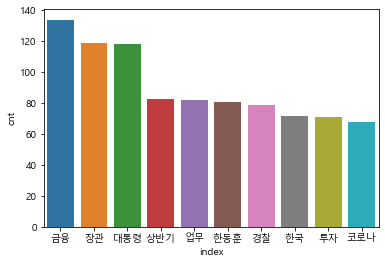

In [9]:
# 단어 빈도수 그래프로 나타내기
sns.barplot(x='index',y='cnt',data=df_total, orient='v')

In [10]:
# 뉴스 전체 주요 키워드 추출 워드클라우드
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='./GmarketSansTTFBold.ttf',background_color='white',
                     colormap='flare', width=1500, height=1000).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 1499.5, 999.5, -0.5)

In [11]:
# 카테고리 대분류-중분류 참고
100 정치(청와대[264] + 국회/정당[265] + 북한[268] + 국방/외교[267])
101 경제(금융[259] + 증권[258] + 산업/재계[261] + 글로벌 경제[262] + 부동산[260])
103 생활/문화(건강정보[241] + 여행/레저[237] + 공연/전시[242] + 날씨[248] + 생활문화 일반[245])
105 IT/과학(통신/뉴미디어[227] + IT 일반[230] + 컴퓨터[283] + 과학 일반[228])

SyntaxError: invalid syntax (3002758558.py, line 2)

In [12]:
# 더 자세히 뜯어보기 위해 범주화 하기

def get_category(x):
    cat = ''
    if (264 <= x <= 268):
        cat = '정치'
    elif (258 <= x <= 262):
        cat = '경제'
    elif (237 <= x <= 248):
        cat = '생활문화'
    else:
        cat = 'IT과학'
    return cat
        
df1 = df.copy()
df1['big_category'] = df1.category.apply(lambda x:get_category(x))
df1

news  category big_category
0       尹 대통령 "기업활동 위축시키는 과도한 형벌 규정 개선" 지시       264           정치
1        국방부 “유엔사, 판문점 통과 허용…북송 승인 의미는 아냐”       264           정치
2                      [포토] 육군 대규모 항공작전 훈련       264           정치
3             尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작       264           정치
4     국내 7대 종단 지도자들 "이명박·이재용·김경수 통큰 사면 요청"       264           정치
...                                    ...       ...          ...
3049                 프랑스 유텔샛 “스페이스X 게 섰거라”       228         IT과학
3050   크리스탈지노믹스, 제이앤씨사이언스와 코로나19 치료제 후보 발굴       228         IT과학
3051                  세상에서 가장 작은 반도체 구조 규명       228         IT과학
3052     클래시스 “알파, 복부 지방감소 효과 연구 국제학술지 게재”       228         IT과학
3053              [부고] 김윤호 SK플라즈마 대표이사 빙부상       228         IT과학

[3054 rows x 3 columns]

### 정치

In [13]:
# 정치 분야 분석하기

df_politic = df1.loc[df1.big_category=='정치']
df_politic

news  category big_category
0        尹 대통령 "기업활동 위축시키는 과도한 형벌 규정 개선" 지시       264           정치
1         국방부 “유엔사, 판문점 통과 허용…북송 승인 의미는 아냐”       264           정치
2                       [포토] 육군 대규모 항공작전 훈련       264           정치
3              尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작       264           정치
4      국내 7대 종단 지도자들 "이명박·이재용·김경수 통큰 사면 요청"       264           정치
..                                      ...       ...          ...
687                     "북 아사자 발생, 놀랄 일 아냐"       268           정치
688  [첫 대정부 질문] ⓛ "탈북어민 강제북송, 흉악범이어도 잘못된 것"       268           정치
689                     "북 아사자 발생, 놀랄 일 아냐"       268           정치
690  [첫 대정부 질문] ⓛ "탈북어민 강제북송, 흉악범이어도 잘못된 것"       268           정치
691                     "북 아사자 발생, 놀랄 일 아냐"       268           정치

[692 rows x 3 columns]

In [14]:
# 내용 부분 추출해서 리스트로 만들기
df_politic_list= df_politic.news.values.tolist()
df_politic_list

['尹 대통령 "기업활동 위축시키는 과도한 형벌 규정 개선" 지시',
 '국방부 “유엔사, 판문점 통과 허용…북송 승인 의미는 아냐”',
 '[포토] 육군 대규모 항공작전 훈련',
 '尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작',
 '국내 7대 종단 지도자들 "이명박·이재용·김경수 통큰 사면 요청"',
 "[정치+] 윤대통령, '국기 문란' 경찰 질타…경찰 내부 반발 고조",
 '尹 대통령 최측근 한동훈 법무장관에 무슨 지시했나?',
 '尹대통령 “법무행정 최우선은 경제 살리기…기업 위축하는 형벌규정 개선”',
 '문체부 "청와대 활용 정부 내 혼선 없어…이미 정리"',
 '[법무부 업무보고] 한동훈 "공수처 1년, 국가 범죄대응 역량 약화"',
 '쌍용차 채권단 "변제율 6% 상식적이지 않아"…尹대통령에 탄원',
 '브리핑하는 한동훈 법무부장관',
 "항명이냐 강압이냐…尹 대통령과 '14만 경찰' 대치 전선 고조(종합)",
 '尹 한동훈에 “기업활동 위축 과도한 형벌 개선하라”',
 '윤대통령 "경찰 집단행동 국기문란"…경찰국 신설안 국무회의 통과',
 '"검수완박 이전으로 회귀"…尹, 한동훈에 수사권 강화 보고받아',
 '국내 7대 종단 지도자들 “이명박·이재용·김경수 통큰 특별사면” 탄원',
 '윤 대통령, 한동훈에 "법무행정 최우선, 경제 살리기" 당부',
 '한동훈, \'檢티타임 부활 지적에 "언론으로부터 불편 질문받아야"',
 '박홍근 “경찰국 신설, 이상민 행안부 장관의 행정 쿠데타”',
 '[포토] 육군 이천기지서 열린 대규모 항공작전 FTX',
 '한동훈, 박범계 \'검언유착\' 지적에 "전정부는 흘리기 없었나"',
 '한동훈 "제가 인사 평가 주제 넘어…現검증 시스템 안착 고민할 때"',
 '尹 "법무행정 최우선 경제에"…한동훈 "이재용 사면? 언급 부적절"',
 '공수처, 尹 대통령 ‘사적 채용 논란’ 고발 사건 수사 착수',
 "공수처, 尹대통령 '사적채용 논란' 고발건 수사1부 배당",
 '尹대통령 "기업 활동 위축 과도한 형벌

In [15]:
# 스트링으로 만들기
df_politic_str = str(df_politic_list)
df_politic_str

'[\'尹 대통령 "기업활동 위축시키는 과도한 형벌 규정 개선" 지시\', \'국방부 “유엔사, 판문점 통과 허용…북송 승인 의미는 아냐”\', \'[포토] 육군 대규모 항공작전 훈련\', \'尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작\', \'국내 7대 종단 지도자들 "이명박·이재용·김경수 통큰 사면 요청"\', "[정치+] 윤대통령, \'국기 문란\' 경찰 질타…경찰 내부 반발 고조", \'尹 대통령 최측근 한동훈 법무장관에 무슨 지시했나?\', \'尹대통령 “법무행정 최우선은 경제 살리기…기업 위축하는 형벌규정 개선”\', \'문체부 "청와대 활용 정부 내 혼선 없어…이미 정리"\', \'[법무부 업무보고] 한동훈 "공수처 1년, 국가 범죄대응 역량 약화"\', \'쌍용차 채권단 "변제율 6% 상식적이지 않아"…尹대통령에 탄원\', \'브리핑하는 한동훈 법무부장관\', "항명이냐 강압이냐…尹 대통령과 \'14만 경찰\' 대치 전선 고조(종합)", \'尹 한동훈에 “기업활동 위축 과도한 형벌 개선하라”\', \'윤대통령 "경찰 집단행동 국기문란"…경찰국 신설안 국무회의 통과\', \'"검수완박 이전으로 회귀"…尹, 한동훈에 수사권 강화 보고받아\', \'국내 7대 종단 지도자들 “이명박·이재용·김경수 통큰 특별사면” 탄원\', \'윤 대통령, 한동훈에 "법무행정 최우선, 경제 살리기" 당부\', \'한동훈, \\\'檢티타임 부활 지적에 "언론으로부터 불편 질문받아야"\', \'박홍근 “경찰국 신설, 이상민 행안부 장관의 행정 쿠데타”\', \'[포토] 육군 이천기지서 열린 대규모 항공작전 FTX\', \'한동훈, 박범계 \\\'검언유착\\\' 지적에 "전정부는 흘리기 없었나"\', \'한동훈 "제가 인사 평가 주제 넘어…現검증 시스템 안착 고민할 때"\', \'尹 "법무행정 최우선 경제에"…한동훈 "이재용 사면? 언급 부적절"\', \'공수처, 尹 대통령 ‘사적 채용 논란’ 고발 사건 수사 착수\', "공수처, 尹대통령 \'사적채용 논란\' 고발건

In [16]:
# 텍스트 정제하기
df_politic_str = re.sub('[^가-힣0-9]',' ',df_politic_str)
df_politic_str = re.sub('\s{2,}',' ',df_politic_str)
df_politic_str

' 대통령 기업활동 위축시키는 과도한 형벌 규정 개선 지시 국방부 유엔사 판문점 통과 허용 북송 승인 의미는 아냐 포토 육군 대규모 항공작전 훈련 유럽에 이어 아세안과도 정상간 비즈니스외교 시작 국내 7대 종단 지도자들 이명박 이재용 김경수 통큰 사면 요청 정치 윤대통령 국기 문란 경찰 질타 경찰 내부 반발 고조 대통령 최측근 한동훈 법무장관에 무슨 지시했나 대통령 법무행정 최우선은 경제 살리기 기업 위축하는 형벌규정 개선 문체부 청와대 활용 정부 내 혼선 없어 이미 정리 법무부 업무보고 한동훈 공수처 1년 국가 범죄대응 역량 약화 쌍용차 채권단 변제율 6 상식적이지 않아 대통령에 탄원 브리핑하는 한동훈 법무부장관 항명이냐 강압이냐 대통령과 14만 경찰 대치 전선 고조 종합 한동훈에 기업활동 위축 과도한 형벌 개선하라 윤대통령 경찰 집단행동 국기문란 경찰국 신설안 국무회의 통과 검수완박 이전으로 회귀 한동훈에 수사권 강화 보고받아 국내 7대 종단 지도자들 이명박 이재용 김경수 통큰 특별사면 탄원 윤 대통령 한동훈에 법무행정 최우선 경제 살리기 당부 한동훈 티타임 부활 지적에 언론으로부터 불편 질문받아야 박홍근 경찰국 신설 이상민 행안부 장관의 행정 쿠데타 포토 육군 이천기지서 열린 대규모 항공작전 한동훈 박범계 검언유착 지적에 전정부는 흘리기 없었나 한동훈 제가 인사 평가 주제 넘어 검증 시스템 안착 고민할 때 법무행정 최우선 경제에 한동훈 이재용 사면 언급 부적절 공수처 대통령 사적 채용 논란 고발 사건 수사 착수 공수처 대통령 사적채용 논란 고발건 수사1부 배당 대통령 기업 활동 위축 과도한 형벌 규정 개선 대통령 복심 한동훈 장관에 기업활동 위축 과도한 형벌규정 개선하라 지시 한동훈 장관에 기업 위축시키는 과도한 형벌 개선하라 뉴스1 윤석열 대통령 경찰 집단 반발 국가 기강 문란 그래픽 경찰국 신설 행안부 직제 개정안 국무회의 통과 한동훈 공정과 상식으로 이끌 분이 검찰총장 되길 희망 법무부 업무보고 받는 윤석열 대통령 한동훈 사면 대통령 고유권한 기준 

In [17]:
# 문자 형태 분석
import requests
from bs4 import BeautifulSoup as bs
import xmltodict
from konlpy.tag import Okt

okt = Okt()
morph = okt.pos(df_politic_str) #형태소 변환
noun_list = []
for word, tag in morph:
    if(tag=='Noun') & (len(word)>1):
        noun_list.append(word)
print(morph)
print(noun_list)

[('대통령', 'Noun'), ('기업', 'Noun'), ('활동', 'Noun'), ('위축', 'Noun'), ('시키는', 'Verb'), ('과도', 'Noun'), ('한', 'Josa'), ('형벌', 'Noun'), ('규정', 'Noun'), ('개선', 'Noun'), ('지시', 'Noun'), ('국방부', 'Noun'), ('유엔', 'Noun'), ('사', 'Noun'), ('판문점', 'Noun'), ('통과', 'Noun'), ('허용', 'Noun'), ('북송', 'Noun'), ('승인', 'Noun'), ('의미', 'Noun'), ('는', 'Josa'), ('아냐', 'Verb'), ('포토', 'Noun'), ('육군', 'Noun'), ('대규모', 'Noun'), ('항공', 'Noun'), ('작전', 'Noun'), ('훈련', 'Noun'), ('유럽', 'Noun'), ('에', 'Josa'), ('이어', 'Verb'), ('아세안', 'Noun'), ('과도', 'Josa'), ('정상', 'Noun'), ('간', 'Suffix'), ('비즈니스', 'Noun'), ('외교', 'Noun'), ('시작', 'Noun'), ('국내', 'Noun'), ('7', 'Number'), ('대', 'Verb'), ('종단', 'Noun'), ('지도자', 'Noun'), ('들', 'Suffix'), ('이명박', 'Noun'), ('이재용', 'Noun'), ('김경수', 'Noun'), ('통큰', 'Noun'), ('사면', 'Noun'), ('요청', 'Noun'), ('정치', 'Noun'), ('윤', 'Noun'), ('대통령', 'Noun'), ('국기', 'Noun'), ('문란', 'Noun'), ('경찰', 'Noun'), ('질타', 'Noun'), ('경찰', 'Noun'), ('내부', 'Noun'), ('반발', 'Noun'), ('고조', 'Noun'), ('대통령', 'Noun

In [18]:
# 많이 쓰는 단어 카운트해서 데이터프레임 만들어주기
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family='Malgun Gothic') #한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
count = Counter(noun_list)
data = dict(count.most_common())
serise = pd.Series(data)
df_politic_word = pd.DataFrame(serise,columns=['cnt'])
df_politic_word = df_politic_word.sort_values(by='cnt',ascending=False)[:10]
df_politic_word.reset_index(inplace=True)
df_politic_word

index  cnt
0   대통령  115
1    장관   99
2   한동훈   81
3    경찰   78
4    국회   64
5    축하   62
6    박진   47
7    상임   46
8    업무   43
9    보고   43

<AxesSubplot:xlabel='index', ylabel='cnt'>

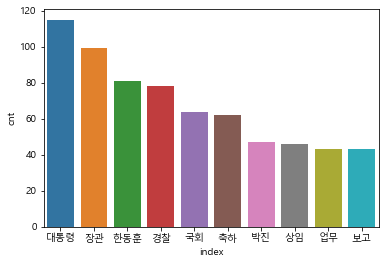

In [19]:
# 단어 빈도수 그래프로 나타내기
sns.barplot(x='index',y='cnt',data=df_politic_word, orient='v')

(-0.5, 1499.5, 999.5, -0.5)

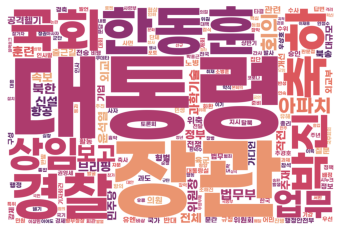

In [20]:
# 정치 분야 주요 키워드 추출 워드클라우드
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='./GmarketSansTTFBold.ttf',background_color='white',
                     colormap='flare', width=1500, height=1000).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')

## 경제

In [21]:
df_economy = df1.loc[df1.big_category=='경제']
df_economy

# 내용 부분 추출해서 리스트로 만들기
df_economy_list= df_economy.news.values.tolist()

# 스트링으로 만들기
df_economy_str = str(df_economy_list)

# 텍스트 정제하기
df_economy_str = re.sub('[^가-힣0-9]',' ',df_economy_str)
df_economy_str = re.sub('\s{2,}',' ',df_economy_str)
df_economy_str


' 시중은행 전체로 번진 수상한 외환거래 은행 제재 불가피 현대해상 코로나로 미뤘던 해외사업 속도 10년간 동일 업무 담당한 우리은행 횡령범 명령휴가 대상도 아니었다 농협금융 상반기 순이익 1조3505억원 사상 최대 전년 5 3 증가 신한라이프 세대 겨냥 콘텐츠로 보험 유튜브 분야 대상 수상 증권 와 디지털자산 플랫폼 구축 협약 농협금융 상반기 순이익 1조3505억원 건전성 개선 금융 상반기 순이익 3200억원 역대 최대 전년 15 증가 경제 하반기 성장세 둔화 올해 성장률 2 대 초중반 전망 종합 금융위 금융안정계정 도입한다 금융사 부실 예방 효과 기대 토스뱅크 1000억원 규모 유상증자 총 1조500억원 확보 금융그룹 상반기 순이익 3천200억원 전년 동기 대비 15 한국은행 금통위원에 신성환 홍익대 교수 추천 게시판 증권 와 디지털자산 플랫폼 구축 협약 금리상승 하락장에 증권사 2분기 실적 암울 이익 반토막 빗썸 최대주주 비덴트 와 접촉 사실 아직 정해진 건 없다 토스뱅크 1000억 유상증자 결의 총 1조500억 자본금 확보 빗썸 최대주주 비덴트 에 빗썸 매각 협의 중 암호화폐 협의체 뭐하나 유의종목 지정 후 나 몰라라 하는 거래소 광주은행 전남 관광지 방문 고객 우대 금리 적금 출시 농협생명 재무 건전성 우려 불식 비율 정상 궤도 삼성 카드 세대 맞춤형카드로 인기 농협은행 광주영업본부 소외계층학생에 행복나눔쌀 1200포 전달 게시판 신한은행 한국금융사박물관 여름방학 교육 프로그램 시행 손병환 웃었다 농협금융 사상 최대 실적 달성 전주 찾은 금감원장 불법금융 피해 예방 캠페인 전주 찾은 금감원장 불법금융 피해 예방 캠페인 농협금융 올해 상반기 순익 1조 3505억원 지주 출범 후 최대 우리종합금융 신규 휴면고객 대상 골드바 등 경품 이벤트 전북경찰청장 불법금융 피해 예방 캠페인 불법금융 피해 예방 안내문 나눠주는 금감원장 금융 상반기 순익 3200억 늘어난 이자이익에 최대 실적 은행권 이상 외환거래 의혹 확산하나 수협은행 인천항만공사와 동반성장 업무협약 

In [22]:
# 문자 형태 분석
import requests
from bs4 import BeautifulSoup as bs
import xmltodict
from konlpy.tag import Okt

okt = Okt()
morph = okt.pos(df_economy_str) #형태소 변환
noun_list = []
for word, tag in morph:
    if(tag=='Noun') & (len(word)>1):
        noun_list.append(word)
print(morph)
print(noun_list)

[('시중', 'Noun'), ('은행', 'Noun'), ('전체', 'Noun'), ('로', 'Josa'), ('번진', 'Noun'), ('수상한', 'Noun'), ('외환거래', 'Noun'), ('은행', 'Noun'), ('제재', 'Noun'), ('불가피', 'Noun'), ('현대', 'Noun'), ('해상', 'Noun'), ('코로나', 'Noun'), ('로', 'Josa'), ('미뤘던', 'Verb'), ('해외', 'Noun'), ('사업', 'Noun'), ('속도', 'Noun'), ('10년', 'Number'), ('간', 'Foreign'), ('동일', 'Noun'), ('업무', 'Noun'), ('담당', 'Noun'), ('한', 'Josa'), ('우리은행', 'Noun'), ('횡령', 'Noun'), ('범', 'Noun'), ('명령', 'Noun'), ('휴가', 'Noun'), ('대상', 'Noun'), ('도', 'Josa'), ('아니었다', 'Adjective'), ('농협', 'Noun'), ('금융', 'Noun'), ('상반기', 'Noun'), ('순이익', 'Noun'), ('1조', 'Number'), ('3505억원', 'Number'), ('사상', 'Noun'), ('최대', 'Noun'), ('전', 'Modifier'), ('년', 'Noun'), ('5', 'Number'), ('3', 'Number'), ('증가', 'Noun'), ('신', 'Modifier'), ('한', 'Modifier'), ('라이프', 'Noun'), ('세대', 'Noun'), ('겨냥', 'Noun'), ('콘텐츠', 'Noun'), ('로', 'Josa'), ('보험', 'Noun'), ('유튜브', 'Noun'), ('분야', 'Noun'), ('대상', 'Noun'), ('수상', 'Noun'), ('증권', 'Noun'), ('와', 'Verb'), ('디지털', 'Noun'), ('

In [23]:
# 불용어 list 처리
# 불용어 링크 : https://www.ranks.nl/stopwords/korean
with open('./datasets/stopwords.txt', "r", encoding='UTF8') as f:
    stop_words = f.readlines()
    
stop_words = "".join(stop_words)
stop_words = stop_words.split('\n')

konlpy = [noun_list]

noun_list = [noun for noun in noun_list if not noun in stop_words]

print(noun_list)

['시중', '은행', '전체', '번진', '수상한', '외환거래', '은행', '제재', '불가피', '현대', '해상', '코로나', '해외', '사업', '속도', '동일', '업무', '담당', '우리은행', '횡령', '명령', '휴가', '대상', '농협', '금융', '상반기', '순이익', '사상', '최대', '증가', '라이프', '세대', '겨냥', '콘텐츠', '보험', '유튜브', '분야', '대상', '수상', '증권', '디지털', '자산', '플랫폼', '구축', '협약', '농협', '금융', '상반기', '순이익', '건전성', '개선', '금융', '상반기', '순이익', '역대', '최대', '증가', '경제', '하반기', '성장', '둔화', '올해', '성장', '중반', '전망', '종합', '금융위', '금융', '안정', '계정', '도입', '금융', '부실', '예방', '효과', '기대', '토스', '뱅크', '규모', '유상증자', '확보', '금융', '그룹', '상반기', '순이익', '동기', '대비', '한국은행', '금통위', '신성환', '홍익대', '교수', '추천', '게시판', '증권', '디지털', '자산', '플랫폼', '구축', '협약', '금리', '상승', '하락', '증권사', '실적', '이익', '반토막', '빗썸', '최대', '주주', '덴트', '접촉', '사실', '정해진', '토스', '뱅크', '유상증자', '결의', '자본금', '확보', '빗썸', '최대', '주주', '덴트', '빗썸', '매각', '협의', '암호', '화폐', '협의', '유의', '종목', '지정', '거래소', '광주', '은행', '전남', '관광지', '방문', '고객', '우대', '금리', '적금', '출시', '농협생명', '재무', '건전성', '우려', '비율', '정상', '궤도', '삼성', '카드', '세대', '맞춤', '카드', '인기', '농협', '은행', '

In [24]:
# 많이 쓰는 단어 카운트해서 데이터프레임 만들어주기
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family='Malgun Gothic') #한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
count = Counter(noun_list)
data = dict(count.most_common())
serise = pd.Series(data)
df_economy_word = pd.DataFrame(serise,columns=['cnt'])
df_economy_word = df_economy_word.sort_values(by='cnt',ascending=False)[:10]
df_economy_word.reset_index(inplace=True)
df_economy_word

index  cnt
0    금융  132
1   상반기   56
2    영업   51
3    금리   45
4    지원   38
5    현대   35
6    투자   34
7    공급   33
8    한국   32
9    서울   31

In [25]:
# 단어 빈도수 그래프로 나타내기
sns.barplot(x='index',y='cnt',data=df_economy_word, orient='v')

<AxesSubplot:xlabel='index', ylabel='cnt'>

In [26]:
# 워드클라우드
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='./GmarketSansTTFBold.ttf',background_color='white',
                     colormap='flare', width=1500, height=1000).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 1499.5, 999.5, -0.5)

## 생활문화

In [27]:
df_life = df1.loc[df1.big_category=='생활문화']
df_life

# 내용 부분 추출해서 리스트로 만들기
df_life_list= df_life.news.values.tolist()

# 스트링으로 만들기
df_life_str = str(df_life_list)

# 텍스트 정제하기
df_life_str = re.sub('[^가-힣0-9]',' ',df_life_str)
df_life_str = re.sub('\s{2,}',' ',df_life_str)
df_life_str


' 이종이식 한걸음 가까워진다 86세 여성 가 말하는 100세까지 건강하게 사는 법 호기심 그리고 메모하기 인터뷰 악몽도 심하면 병 벗어나는 방법은 환경보건시민센터 휴대용 선풍기 전자파 측정 낮잠 자주 자면 혈압 높아진다 부산엑스포 유치 부산과 대한민국 미래 걸렸다 부광약품 조현병 치료제 연내 신약허가 신청 소식에 주가 바이오 거창항노화힐링랜드 웰니스관광지 선정 산림관광산업 중심지로 아토피 피부염을 악화하는 뜻밖의 원인 4 속보영상 질병청 2차 접종자 코로나 감염 후 심근경색 뇌경색 위험도 낮다 게시판 넛지헬스케어 다이어트 앱 지니어트 에 생리 캘린더 기능 추가 종근당 국내최초 말초신경병증 간기능 개선 성분 벤포벨 에스 출시 환경보건시민센터 휴대용 선풍기 전자파 측정 2차 접종자 코로나 감염 후 심근경색 뇌경색 발생 위험 낮아져 모기에 물리면 식초 양파즙 등 손쉬운 대처법 크리스탈지노믹스 제이앤씨사이언스 팍스로비드와 동일기전 코로나 치료제 개발 착수 갑자기 찐 살 주 이내에 빨리 빼야 하는 이유 2차접종자 코로나 감염 후 심혈관계질환 위험 절반 이하 스트레스 저리 가 하이원리조트에서 힐링하세요 췌장암 환자 계속 증가한다 2040년 연간 1만6천명 발생 전망 여름철 물놀이 할 때 콘텍트렌즈 끼면 안돼 심한 생리통 난임 유발 자궁선근증 원인 찾았다 필립스코리아 원더오브유 캠페인 켄타우로스 변이 확산 이중고 코로나19 신규확진 10만명 초읽기 휴젤 보툴렉스 미간주름 개선 효과 장기 투여에도 유효성 안전성 입증 시각장애인의 눈 지팡이 초음파 기술로 기능 향상 앞둬 담배 피워도 건강 슈퍼 혈관 비밀 밝혀졌다 자폐증 일으키는 새 유전자 변이 찾았다 식약처 콘택트렌즈 끼고 물놀이하면 세균 곰팡이 감염 위험 코로나 한번도 안 걸렸다고 곰곰이 생각해보세요 전북도교육청 학생건강증진센터 운영 위탁기관 공모 약손 물 비싼 외국 생수보다 더 좋은 물이 대구에 생명연 파킨슨병 유발 유전자 11 위암 발생과도 연관 필립스코리아 원더오브유 캠페인 이 암 2040년 한국인 위협할 주요 암 

In [28]:
# 문자 형태 분석
import requests
from bs4 import BeautifulSoup as bs
import xmltodict
from konlpy.tag import Okt

okt = Okt()
morph = okt.pos(df_life_str) #형태소 변환
noun_list = []
for word, tag in morph:
    if(tag=='Noun') & (len(word)>1):
        noun_list.append(word)
print(morph)
print(noun_list)

[('이종이식', 'Noun'), ('한', 'Determiner'), ('걸음', 'Noun'), ('가까워진다', 'Verb'), ('86', 'Number'), ('세', 'Noun'), ('여성', 'Noun'), ('가', 'Verb'), ('말', 'Noun'), ('하는', 'Verb'), ('100', 'Number'), ('세', 'Noun'), ('까지', 'Josa'), ('건강하게', 'Adjective'), ('사는', 'Verb'), ('법', 'Noun'), ('호기심', 'Noun'), ('그리고', 'Conjunction'), ('메모', 'Noun'), ('하기', 'Verb'), ('인터뷰', 'Noun'), ('악몽', 'Noun'), ('도', 'Josa'), ('심하면', 'Adjective'), ('병', 'Noun'), ('벗어나는', 'Verb'), ('방법', 'Noun'), ('은', 'Josa'), ('환경', 'Noun'), ('보건', 'Noun'), ('시민', 'Noun'), ('센터', 'Noun'), ('휴대', 'Noun'), ('용', 'Noun'), ('선풍기', 'Noun'), ('전자파', 'Noun'), ('측정', 'Noun'), ('낮잠', 'Noun'), ('자주', 'Noun'), ('자면', 'Verb'), ('혈압', 'Noun'), ('높아진다', 'Verb'), ('부산', 'Noun'), ('엑스포', 'Noun'), ('유치', 'Noun'), ('부산', 'Noun'), ('과', 'Josa'), ('대한민국', 'Noun'), ('미래', 'Noun'), ('걸렸다', 'Verb'), ('부광약품', 'Noun'), ('조현병', 'Noun'), ('치료', 'Noun'), ('제', 'Noun'), ('연내', 'Noun'), ('신약', 'Noun'), ('허가', 'Noun'), ('신청', 'Noun'), ('소식', 'Noun'), ('에', 'Josa'), 

In [29]:
# 불용어 list 처리
# 불용어 링크 : https://www.ranks.nl/stopwords/korean
with open('./datasets/stopwords.txt', "r", encoding='UTF8') as f:
    stop_words = f.readlines()
    
stop_words = "".join(stop_words)
stop_words = stop_words.split('\n')

konlpy = [noun_list]

noun_list = [noun for noun in noun_list if not noun in stop_words]

print(noun_list)

['이종이식', '걸음', '여성', '호기심', '메모', '인터뷰', '악몽', '방법', '환경', '보건', '시민', '센터', '휴대', '선풍기', '전자파', '측정', '낮잠', '자주', '혈압', '부산', '엑스포', '유치', '부산', '대한민국', '미래', '부광약품', '조현병', '치료', '연내', '신약', '허가', '신청', '소식', '주가', '바이오', '거창', '항노화', '힐링', '랜드', '니스', '관광지', '선정', '산림', '관광', '산업', '중심지', '아토피', '피부염', '악화', '뜻밖', '원인', '속보', '영상', '질병', '접종', '코로나', '감염', '심근경색', '뇌경색', '위험', '게시판', '넛지헬', '스케', '다이어트', '생리', '캘린더', '기능', '추가', '종근당', '국내', '최초', '말초신경', '병증', '기능', '개선', '성분', '포벨', '에스', '출시', '환경', '보건', '시민', '센터', '휴대', '선풍기', '전자파', '측정', '접종', '코로나', '감염', '심근경색', '뇌경색', '발생', '위험', '모기', '물리', '식초', '양파', '대처', '크리스탈', '지노', '믹스', '사이언스', '팍스', '비드', '동일', '기전', '코로나', '치료', '개발', '착수', '갑자기', '이내', '이유', '접종', '코로나', '감염', '심혈관계', '질환', '위험', '절반', '이하', '스트레스', '저리', '하이원리조트', '힐링', '췌장암', '환자', '계속', '증가', '연간', '발생', '전망', '여름철', '물놀이', '콘텍트', '렌즈', '생리통', '난임', '유발', '자궁', '선근', '원인', '필립스', '코리아', '원더', '오브', '캠페인', '켄타우로스', '확산', '이중고', '코로나', '신규', '확진', '초읽기', '보툴'

In [30]:
# 많이 쓰는 단어 카운트해서 데이터프레임 만들어주기
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family='Malgun Gothic') #한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
count = Counter(noun_list)
data = dict(count.most_common())
serise = pd.Series(data)
df_life_word = pd.DataFrame(serise,columns=['cnt'])
df_life_word = df_life_word.sort_values(by='cnt',ascending=False)[:10]
df_life_word.reset_index(inplace=True)
df_life_word

index  cnt
0    중복   66
1    폭염   61
2    날씨   59
3   소나기   51
4    우영   46
5   팽나무   41
6    오늘   40
7    공연   33
8    더위   33
9   물놀이   32

<AxesSubplot:xlabel='index', ylabel='cnt'>

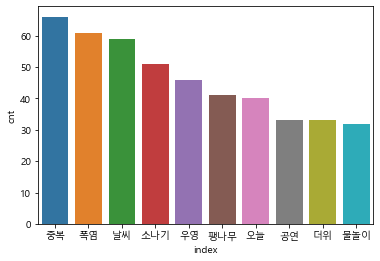

In [31]:
# 단어 빈도수 그래프로 나타내기
sns.barplot(x='index',y='cnt',data=df_life_word, orient='v')

(-0.5, 1499.5, 999.5, -0.5)

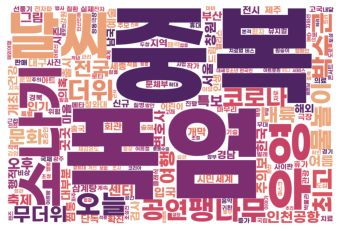

In [32]:
# 워드클라우드
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='./GmarketSansTTFBold.ttf',background_color='white',
                     colormap='flare', width=1500, height=1000).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')

## IT과학

In [33]:
df_tech = df1.loc[df1.big_category=='IT과학']
df_tech

# 내용 부분 추출해서 리스트로 만들기
df_tech_list= df_tech.news.values.tolist()

# 스트링으로 만들기
df_tech_str = str(df_tech_list)

# 텍스트 정제하기
df_tech_str = re.sub('[^가-힣0-9]',' ',df_tech_str)
df_tech_str = re.sub('\s{2,}',' ',df_tech_str)
df_tech_str

' 누구 안심 개편 5개월 만에 서비스 종료 왜 디지털 융합 콘텐츠의 힘 텔레콤 스튜디오 연결로 제작 초협력 지원 디지털 융합 콘텐츠의 힘 32 초고화질 버추얼 제작 지원 이지스 디지털트윈 분야 협력 현실과 같은 가상공간 구축한다 무선국 제도개선 민관협의체 8월 초 킥오프 규제 완화 논의 아이들나라 신인작가 그림책 콘텐츠 담는다 상반기 5 통신분쟁 급증 신청건수 해결률 가장 많아 아이들나라 신인 작가 창작 그림책 읽어주기 서비스 이지스와 디지털 트윈 사업 확대 위한 업무협약 체결 씨에스리 데이터분석 빅재미 공공기관 디지털 행정 서비스 도구 주목 5 통신분쟁 해결률 44 7 84 7 대폭 상승 이즈파크 6 대역 기반 차세대 스마트공장 서비스 실증 착수 헬로비전 헬로 전면 개편 고압송전선 수준 국립전파연구원 휴대용 목 선풍기 전자파 양호 110년 만에 지적재조사 부산서 라이다 드론 등 신기술 시연 음저협 방송사용료 청구소송 최종 승소 아이들나라 신인 작가 창작 그림책 독점 제공 포스트 우영우 노린다 하반기 라인업 공개 휴대용 선풍기 전자파 인체보호 기준 충족 방통위 2021년 상반기 통신분쟁조정 해결률 84 3 이지스와 디지털 트윈 플랫폼 구축 맞손 티빙 오리지널 돼지의 왕 북미 최대 장르 영화제서 호평 방통위 올 상반기 통신분쟁 477건 유 무선 가 가장 많아 네이버웹툰 블랙 프라이데이 캠퍼스 로맨스 지상최대공모전 대상작 선정 상반기 5 통신분쟁 신청 건수 187 급증 아이들나라 신인 작가 창작 그림책 독점 제공 아이들나라서 신인작가 그림책 공개 우영우 하나로 대박난 하반기 라인업 굿잡 등 예고 전세계 용 생산면적 여의도만큼 커진다 삼성 초격차 유지 우영우 로 대박난 후속 라인업 공개 디스플레이 사무동 전력 100 신재생에너지 전환 지속가능경영보고서 발간 네카오가 인정한 아바타 장인 권승조표 메타버스 4분기 일본 시장 출격 음저협 방송사용료 소송 최종 승소 제2의 우영우 로 연타석 홈런 하반기 드라마 라인업 보니 용접 품질도 로 관리 인더스트리얼 사업 확대 텔레

In [34]:
# 문자 형태 분석
import requests
from bs4 import BeautifulSoup as bs
import xmltodict
from konlpy.tag import Okt

okt = Okt()
morph = okt.pos(df_tech_str) #형태소 변환
noun_list = []
for word, tag in morph:
    if(tag=='Noun') & (len(word)>1):
        noun_list.append(word)
print(morph)
print(noun_list)

[('누구', 'Noun'), ('안심', 'Noun'), ('개편', 'Noun'), ('5', 'Number'), ('개월', 'Noun'), ('만에', 'Josa'), ('서비스', 'Noun'), ('종료', 'Noun'), ('왜', 'Noun'), ('디지털', 'Noun'), ('융합', 'Noun'), ('콘텐츠', 'Noun'), ('의', 'Josa'), ('힘', 'Noun'), ('텔레콤', 'Noun'), ('스튜디오', 'Noun'), ('연결', 'Noun'), ('로', 'Josa'), ('제작', 'Noun'), ('초', 'Noun'), ('협력', 'Noun'), ('지원', 'Noun'), ('디지털', 'Noun'), ('융합', 'Noun'), ('콘텐츠', 'Noun'), ('의', 'Josa'), ('힘', 'Noun'), ('32', 'Number'), ('초고', 'Noun'), ('화질', 'Noun'), ('버추', 'Noun'), ('얼', 'Noun'), ('제작', 'Noun'), ('지원', 'Noun'), ('이지스', 'Noun'), ('디지털', 'Noun'), ('트윈', 'Noun'), ('분야', 'Noun'), ('협력', 'Noun'), ('현실', 'Noun'), ('과', 'Josa'), ('같은', 'Adjective'), ('가상공간', 'Noun'), ('구축', 'Noun'), ('한다', 'Verb'), ('무선', 'Noun'), ('국', 'Noun'), ('제도', 'Noun'), ('개선', 'Noun'), ('민관', 'Noun'), ('협의', 'Noun'), ('체', 'Noun'), ('8월', 'Number'), ('초', 'Noun'), ('킥', 'Noun'), ('오프', 'Noun'), ('규제', 'Noun'), ('완화', 'Noun'), ('논의', 'Noun'), ('아이', 'Noun'), ('들', 'Suffix'), ('나라', 'Noun'

In [35]:
# 불용어 list 처리
# 불용어 링크 : https://www.ranks.nl/stopwords/korean
with open('./datasets/stopwords.txt', "r", encoding='UTF8') as f:
    stop_words = f.readlines()
    
stop_words = "".join(stop_words)
stop_words = stop_words.split('\n')

konlpy = [noun_list]

noun_list = [noun for noun in noun_list if not noun in stop_words]

print(noun_list)

['안심', '개편', '개월', '서비스', '종료', '디지털', '융합', '콘텐츠', '텔레콤', '스튜디오', '연결', '제작', '협력', '지원', '디지털', '융합', '콘텐츠', '초고', '화질', '버추', '제작', '지원', '이지스', '디지털', '트윈', '분야', '협력', '현실', '가상공간', '구축', '무선', '제도', '개선', '민관', '협의', '오프', '규제', '완화', '논의', '나라', '신인', '작가', '그림책', '콘텐츠', '상반기', '통신', '분쟁', '급증', '신청', '건수', '해결', '가장', '나라', '신인', '작가', '창작', '그림책', '서비스', '이지스', '디지털', '트윈', '사업', '확대', '업무', '협약', '체결', '스리', '데이터', '분석', '재미', '공공기관', '디지털', '행정', '서비스', '도구', '주목', '통신', '분쟁', '해결', '대폭', '상승', '이즈', '파크', '대역', '기반', '차세대', '스마트', '공장', '서비스', '실증', '착수', '헬로비전', '헬로', '전면', '개편', '압송', '전선', '수준', '국립', '전파', '연구원', '휴대', '선풍기', '전자파', '양호', '적재', '조사', '부산', '라이', '드론', '기술', '시연', '음저협', '방송', '사용', '청구', '소송', '최종', '승소', '나라', '신인', '작가', '창작', '그림책', '독점', '제공', '포스트', '우영', '하반기', '라인업', '공개', '휴대', '선풍기', '전자파', '인체', '보호', '기준', '충족', '방통위', '상반기', '통신', '분쟁', '조정', '해결', '이지스', '디지털', '트윈', '플랫폼', '구축', '티빙', '리지', '돼지', '북미', '최대', '장르', '영화제', '호평', '방통위', '상반기'

In [36]:
# 많이 쓰는 단어 카운트해서 데이터프레임 만들어주기
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family='Malgun Gothic') #한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
count = Counter(noun_list)
data = dict(count.most_common())
serise = pd.Series(data)
df_tech_word = pd.DataFrame(serise,columns=['cnt'])
df_tech_word = df_tech_word.sort_values(by='cnt',ascending=False)[:10]
df_tech_word.reset_index(inplace=True)
df_tech_word

index  cnt
0   반도체   42
1    투자   35
2   서비스   35
3   자동차   31
4    치료   27
5    가장   25
6    교육   24
7    유지   22
8    나무   22
9    계약   22

<AxesSubplot:xlabel='index', ylabel='cnt'>

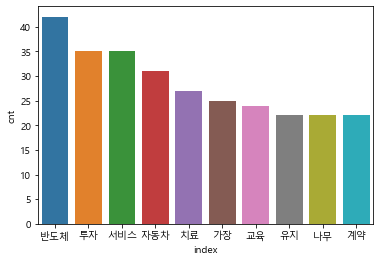

In [37]:
# 단어 빈도수 그래프로 나타내기
sns.barplot(x='index',y='cnt',data=df_tech_word, orient='v')

In [107]:
# 워드클라우드
from wordcloud import WordCloud
from PIL import Image
import numpy as np

icon = Image.open('./wc_img.png')    # 마스크가 될 이미지 불러오기 
plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wordcloud = WordCloud(font_path='./GmarketSansTTFBold.ttf',background_color='white',
                     colormap = 'summer', width=800, height=600, mask=mask).generate_from_frequencies(data)
plt.imshow(wordcloud,interpolation="bilinear")

plt.axis('off')

(-0.5, 266.5, 251.5, -0.5)

# 07-27 수업


In [108]:
html="""
<head>
    <title>crawler</title>
</head>
<body>
    <p class="a" align="center"> text1</p>
    <p class="b" align="center"> text2</p>
    <p class="c" align="center"> text3</p>
    <div>
        <img src="/source" width="300" height="200">
    </div>
</body>
</html>
"""


In [110]:
from bs4 import BeautifulSoup

#자식 나옴
bs = BeautifulSoup(html,'html.parser')
contents = bs.find('body')
for child in contents.children:
    print(child)



<p align="center" class="a"> text1</p>


<p align="center" class="b"> text2</p>


<p align="center" class="c"> text3</p>


<div>
<img height="200" src="/source" width="300"/>
</div>




In [111]:
# 자손이 별도로 나옴
for d in contents.descendants:
    print(d)



<p align="center" class="a"> text1</p>
 text1


<p align="center" class="b"> text2</p>
 text2


<p align="center" class="c"> text3</p>
 text3


<div>
<img height="200" src="/source" width="300"/>
</div>


<img height="200" src="/source" width="300"/>






In [123]:
img_tag = contents.find('img')
img_tag
print(list(img_tag.parents))


[<div>
<img height="200" src="/source" width="300"/>
</div>, <body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>, 
<head>
<title>crawler</title>
</head>
<body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>

]


In [125]:
contents

<body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>

In [124]:
#태그객체
contents.div.img

<img height="200" src="/source" width="300"/>

In [126]:
p_tag = bs.find('p',class_='b')
p_tag

<p align="center" class="b"> text2</p>

In [128]:
# find_previous_sibling(): 바로 이전 형제 노드를 검색
# find_previous_siblings(): 모든 형제 노드를 검색

print(p_tag.find_previous_sibling())
print(p_tag.find_previous_siblings())

<p align="center" class="a"> text1</p>
[<p align="center" class="a"> text1</p>]


In [129]:
p_tag = bs.find('p',class_='c')
print(p_tag.find_previous_sibling())
print(p_tag.find_previous_siblings())

<p align="center" class="b"> text2</p>
[<p align="center" class="b"> text2</p>, <p align="center" class="a"> text1</p>]


In [146]:
import urllib
from bs4 import BeautifulSoup

response = urllib.request.urlopen('http://naver.com')
byte_data = response.read()
html = byte_data.decode('utf-8')
bs = BeautifulSoup(html,'html.parser')
print(bs.find_all('a',{'class':'link_newsstand'}))

[<a class="link_newsstand" data-clk="title" href="http://newsstand.naver.com/" target="_blank">뉴스스탠드</a>]


In [131]:
nlists = bs.find_all('a',{'class':{'link_newsstand','btn_sort','btn_sort.sort_on'}})
for n in nlists:
    print(n.get_text())

뉴스스탠드
구독한 언론사
전체언론사


In [132]:
hlists = bs.find_all({'h1','h2','h3','h4','h5','h6'},limit=5)
for h in hlists:
    print(h.get_text(),'\n')


네이버
 

뉴스스탠드 

주제별 캐스트 

Sign in 

타임스퀘어 



#### 과제 0727_1 코스피 지수, 등락폭 및 등락율을 출력하세요.

In [194]:
# Q. 코스피 지수(#now_value), 등락폭 및 등락율(change_value_and_rate)을 출력하세요.
import urllib
import requests
from bs4 import BeautifulSoup
import re

# 네이버 금융 국내증시 메인 사이트 주소
#url = 'https://finance.naver.com/sise/sise_index.naver?code=KOSPI'

response = urllib.request.urlopen('https://finance.naver.com/sise/sise_index.naver?code=KOSPI')
byte_data = response.read()
html = byte_data.decode('cp949')
bs = BeautifulSoup(html,'html.parser')

print('코스피 지수 :')
print(bs.select_one('#now_value').string)

print('등락폭 / 등락률 :')
rate_tags = bs.find_all('span',class_='fluc')
rate_tags = str(rate_tags)
rate_tags = re.sub('[^0-9%.]',' ',rate_tags)
rate_tags = re.sub('\s{2,}',' ',rate_tags)
rate_tags = re.sub('^\s','',rate_tags)


print(rate_tags)


코스피 지수 :
2,411.27
등락폭 / 등락률 :
1.69 0.07% 


In [139]:
from bs4 import BeautifulSoup

fp = open('./datasets/books.html',encoding='utf-8')
bs = BeautifulSoup(fp,'html.parser')
print(bs)

sel = lambda q:print(bs.select_one(q).string)
sel('#nu')


<ul id="bible">
<li id="ge">Genesis</li>
<li id="ex">Exodus</li>
<li id="le">Leviticus</li>
<li id="nu">Numbers</li>
<li id="de">Deuteronomy</li>
</ul>
Numbers


In [141]:
# 9가지 방식의 Numbers 출력하세요

sel('#nu')
sel('li#nu')
sel('#bible > #nu')
sel('#bible #nu')
sel('ul li#nu')
sel('ul > li#nu')
sel('ul #nu')
sel('ul > #nu')
sel('li:nth-child(4)')
sel('ul li:nth-child(4)')


Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers


#### 과제 0727_2
네이버 뉴스 검색 사이트에서
검색 키워드와 총 필요한 뉴스기사 수를 입력하면 
요청한 만큼 데이터프레임 형태(컬럼은 title,url)로
출력해주는 크롤링 프로그램을 만드세요.

https://search.naver.com/search.naver?where=news&sm=tab_jum&query=


In [202]:
import urllib
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import time
from datetime import datetime

In [220]:
def crawl_news():
    

    now = datetime.now()
    now_ = now.strftime('%Y%m%d')
    
    news_df = pd.DataFrame(columns=['title','url'])

    print('100:정치,101:경제,103:생활/문화,105:IT/과학')
    keyword = int(input('검색 키워드를 숫자로입력해주세요 > '))
    num = int(input('필요한 뉴스 기사 숫자를 입력해주세요 > '))
    
    
    if keyword == 100:
        cats = [264,265,266,267]
    elif keyword == 101:
        cats = [259,258,261,262,260]
    elif keyword == 103:
        cats = [241,237,242,248,245]
    elif keyword == 105:
        cats = [227,230,283,228]
    else:
        print('잘못된 입력입니다.')
        
    ind = 0

    for cat in cats:
        for i in range(15):
            url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1='+str(keyword)+'&mid=shm&date='+now_+'&page='+str(i+1)
            headers = {'User-Agent' :'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.134 Safari/537.36 Edg/103.0.1264.71) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

            news = requests.get(url,headers=headers)
            bs = BeautifulSoup(news.text,'html.parser')
            links = bs.select('#main_content > div > ul> li > dl > dt > a')
                
            newslinks=[]
                
            for j, a in enumerate(links):
                newslink = a.get('href')
                newslinks.append(newslink)
                newslinks = list(set(newslinks)) # 중복 기사 제거
                
                
            for link in newslinks:
                res2 = requests.get(link, headers=headers).text
                bs2 = BeautifulSoup(res2,'html.parser')
                news = bs2.find('div',id=['dic_area']).text
                news = re.sub('\n',' ',news) # 개행 공백으로
                news = re.sub('\t',' ',news) # tab공백으로
                news_df.loc[ind] = [news,cat]
                ind += 1
        return df.head(num)
    
    
crawl_news()

100:정치,101:경제,103:생활/문화,105:IT/과학
검색 키워드를 숫자로입력해주세요 > 100
필요한 뉴스 기사 숫자를 입력해주세요 > 5


ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [ ]:
# 카테고리 대분류-중분류 참고
100 정치(청와대[264] + 국회/정당[265] + 북한[268] + 국방/외교[267])
101 경제(금융[259] + 증권[258] + 산업/재계[261] + 글로벌 경제[262] + 부동산[260])
103 생활/문화(건강정보[241] + 여행/레저[237] + 공연/전시[242] + 날씨[248] + 생활문화 일반[245])
105 IT/과학(통신/뉴미디어[227] + IT 일반[230] + 컴퓨터[283] + 과학 일반[228])

cats = [264,265,266,267]
ind=0 # 행번호
for cat in cats:
    for i in range(15):
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1=100&mid=shm&date=20220726&page='+str(i+1)
        headers = {'User-Agent' :'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.134 Safari/537.36 Edg/103.0.1264.71) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
        news = requests.get(url,headers=headers)
        bs = BeautifulSoup(news.text,'html.parser')
        links = bs.select('#main_content > div > ul> li > dl > dt > a')
        newslinks=[]
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) # 중복 기사 제거
            
        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2,'html.parser')
            news = bs2.find('div',id=['dic_area']).text
            news = re.sub('\n',' ',news) # 개행 공백으로
            news = re.sub('\t',' ',news) # tab공백으로
            news_df.loc[ind] = [news,cat]
            ind += 1
news_df